**Using this template**

1. Change notebook title to assignment title you working on, eg. `Graded Challenge 1 or Milestone 1`
2. Put your identity such as name and batch number below notebook title.
3. Write your description before do any work. State your purpose of this assignment and what you are trying to achieve. 
4. Look at the rubric of this assignment and make sure you understand the criteria.
5. Code your solution in the cell provided below the working area section.
6. State your conlusions, findings, and any other relevant information in the cell provided below the conclusions sections.
7. Save this notebook and rename it to assignment title you working on  eg. `Graded Challenge 1 or Milestone 1`
8. Push your assignment before deadline.
9. Good Luck!

# I. Perkenalan

### Milestones 2 - P1

- Name   : Nabila Edelliana Khairunnisa
- Batch  : 011

### Description
Milestones ini dibuat guna mengevaluasi pembelajaran pada Hacktiv8 Data Science Fulltime Program khususnya pada Phase 1.

Data yang di olah merupakan data tentang sekitar 10 tahun pengamatan cuaca harian dari banyak lokasi di seluruh Australia dengan keterangan sebagai berikut.

**GAMBAR GAMBAR GAMBAR GAMBAR GAMBAR**


### Objective
1. Mampu memahami konsep supervised learning dan unsupervised learning
2. Mampu mempersiapkan data untuk digunakan dalam model supervised learning dan 3. unsupervised learning
4. Mampu mengimplementasikan supervised learning dan unsupervised learning dengan dataset yang baru
5. Mampu melakukan evaluasi model
6. Mampu melakukan model tuning
7. Mampu melakukan model deployment

### Problem Statement

1. Manakah algortima machine learning terbaik untuk dataset ini?
2. Bagaimanakah hyperparameter terbaik dari algoritma terbaik untuk dataset ini?
3. Bagaimana kualitas machine learning dari algoritma dan hyperparameter terbaiknya untuk dataset ini?

## Working Area

```txt
Put your code, analysis, everything below this line

Make sure to check everything the rubric requires before you submit
```

# II. Import Pustaka yang Dibutuhkan

In [ ]:
# Library EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings

# Library pre-processing
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTENC
import warnings

# Library Model Machine Learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier

# Library Evaluasi Model
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report,ConfusionMatrixDisplay,confusion_matrix

# Library Saving dan Open Model
import pickle

# III. Data Loading

In [ ]:
data = pd.read_csv('weatherAUS.csv')
# Menampilkan head data
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [ ]:
# Menampilkan tail data
data.tail()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No
145459,2017-06-25,Uluru,14.9,NaN,0.0,NaN,NaN,NaN,NaN,ESE,...,62.0,36.0,1020.2,1017.9,8.0,8.0,15.0,20.9,No,NaN


In [ ]:
# Membuat salinan data untuk backup
data_copy = data.copy()

In [ ]:
# mengecek ukuran dataset
data.shape

(145460, 23)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

dataset ini terdiri dari kolom-kolom bertipe numerik dan kategorikal

In [ ]:
# menguraikan kolom Date menjadi bulan dan tanggal
data['Date'] = pd.to_datetime(data['Date'], format='%Y-%m-%d')
data['day'] = data['Date'].dt.day
data['month'] = data['Date'].dt.month

# IV. Exploratory Data Analysis (EDA)

## 4.1. Melihat missing value

In [ ]:
# Melihat data yang memiliki missing value
data.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
day                  0
month                0
dtype: int64

terdapat sangat banyak missing values dari total 145460 data.

## 4.2. Melihat unique values kolom kategorikal

In [ ]:
data['WindGustDir'].unique()

array(['W', 'WNW', 'WSW', 'NE', 'NNW', 'N', 'NNE', 'SW', nan, 'ENE',
       'SSE', 'S', 'NW', 'SE', 'ESE', 'E', 'SSW'], dtype=object)

Terdapat cukup banyak kategori di kolom WindGustDir

In [ ]:
data['Location'].unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

Terdapat banyak sekali unique valuesnya.

In [ ]:
data['RainToday'].unique()

array(['No', 'Yes', nan], dtype=object)

In [ ]:
data['RainTomorrow'].unique()

array(['No', 'Yes', nan], dtype=object)

In [ ]:
# menyalin data lagi untuk berjaga-jaga
df_new = data.copy()
df_new.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,day,month
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No,1,12
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No,2,12
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No,3,12
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No,4,12
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No,5,12


In [ ]:
df_new['raintomorrow'] = df_new.RainTomorrow.replace(('Yes','No'), (1,0), regex=True)
df_new['raintoday'] = df_new.RainToday.replace(('Yes','No'), (1,0), regex=True)
df_new['raintomorrow'].unique()

array([ 0.,  1., nan])

In [ ]:
# membuang sementara missing values untuk keperluan visualisasi korelasi
df_new_ = df_new.dropna()

## 4.3. Melihat korelasi setiap kolom dengan target (default_payment_next_month)

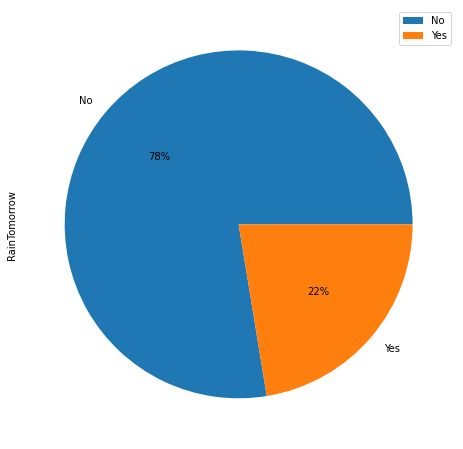

In [ ]:
# Menampilkan persentase data rain tomorrow
df_new['RainTomorrow'].value_counts().plot(kind='pie',legend=True,autopct='%1.0f%%', figsize=(15,8))

terdapat imbalance pada data yaitu sebesar 78% adalah rain tomorrow dan 22% adalah not rain tomorrow. Nantinya akan saya handling handling imbalance data ini dengan smotenc.

In [ ]:
df_new.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow', 'day', 'month', 'raintomorrow',
       'raintoday'],
      dtype='object')

In [ ]:
# membuat list kolom kategorikal
categorical_columns = ['Location	', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']

### Korelasi numerical columns dengan grafik

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

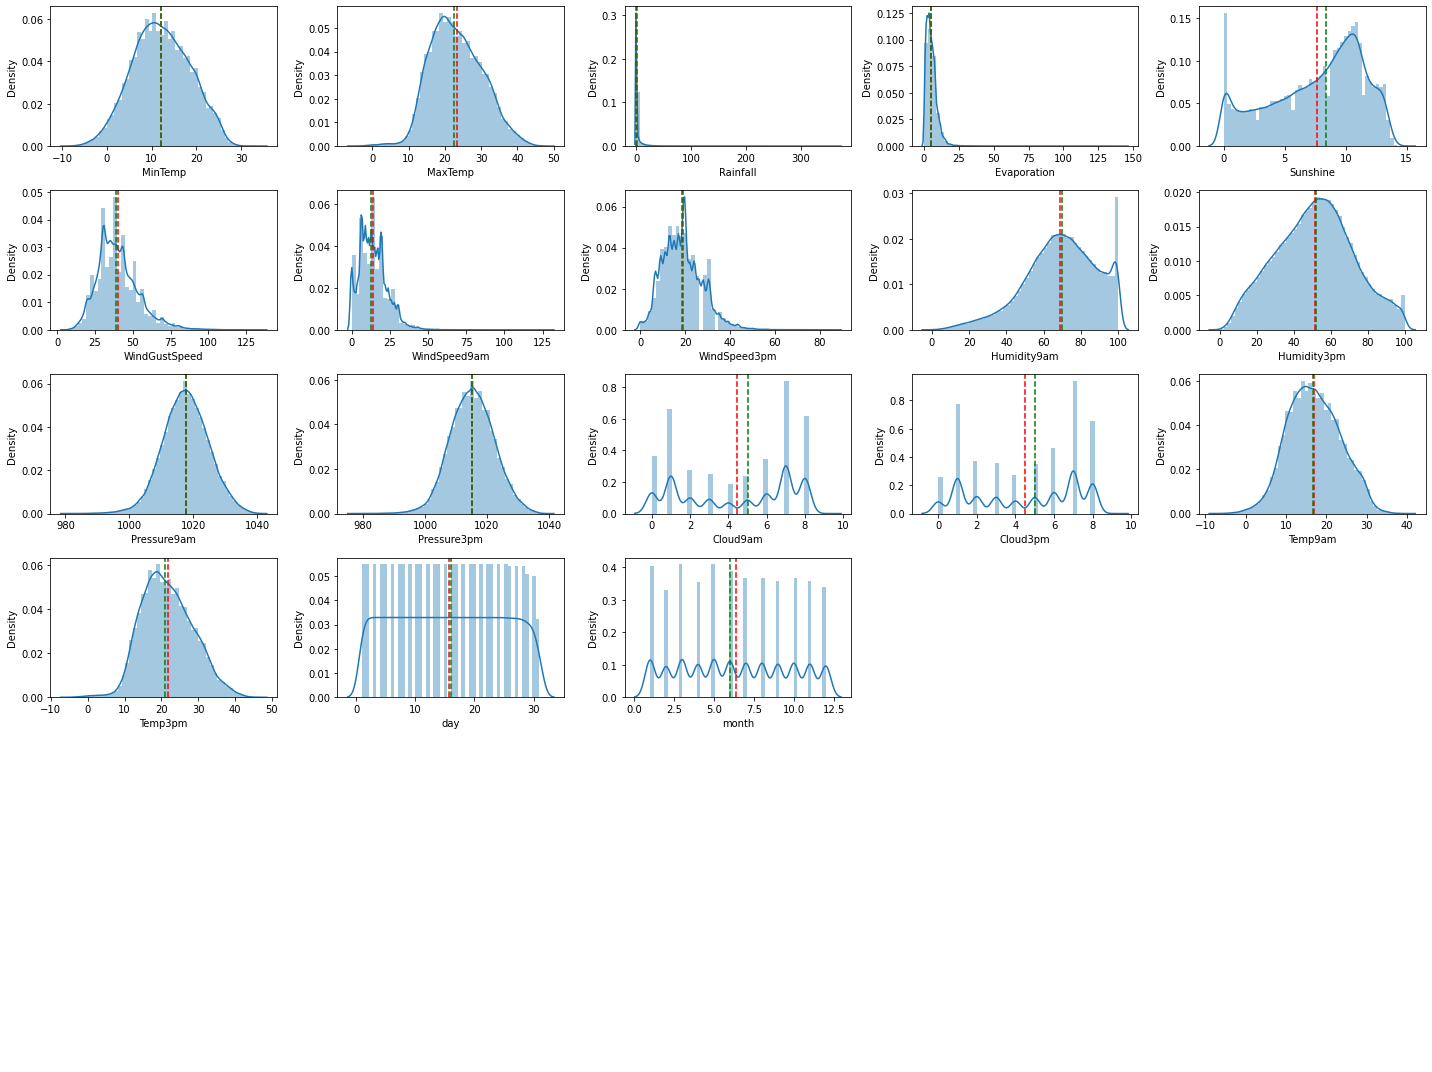

In [ ]:
# membuat list kolom numerikal
numeric_columns = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm','day','month']

# membuat fungsi untuk menampilkan grafik displot
def distplot(df, col, axes):
    sns.distplot(df[col], ax = axes)
    axes.axvline(df[col].mean(), linestyle = '--', color = "red")
    axes.axvline(df[col].median(), linestyle = '--', color = "green")

fig, axes = plt.subplots(6,5, figsize = (20,15))

# menampilkan distplot tiap kolom numerik untuk analisis korelasi
axes = np.ravel(axes)
for i in range(len(numeric_columns)):
    distplot(df_new, numeric_columns[i], axes[i])
for i in range(len(numeric_columns), 6*5):
    axes[i].axis("off")
axes = np.reshape(axes, (6, 5))
plt.tight_layout()
plt.show()

- Apabila dilihat sepintas, dataset ini skewed.
- Rerata temperature saat jam 9 pagi lebih rendah dari jam 3 sore.
- Distribusi rainfall hampir mirip dengan evaporation. Hal ini wajar saja karena evaporasi tinggi menyebabkan banyak butir air terkumpul di awan dan nantinya akan turun sebagai hujan.

Saya akan melihat korelasi antar-kolom. Akan tetapi kolom RainToday dan RainTomorrow masih bertipe object sehingga harus dijadikan integer dahulu agar bisa divisualisasikan di heatmap.

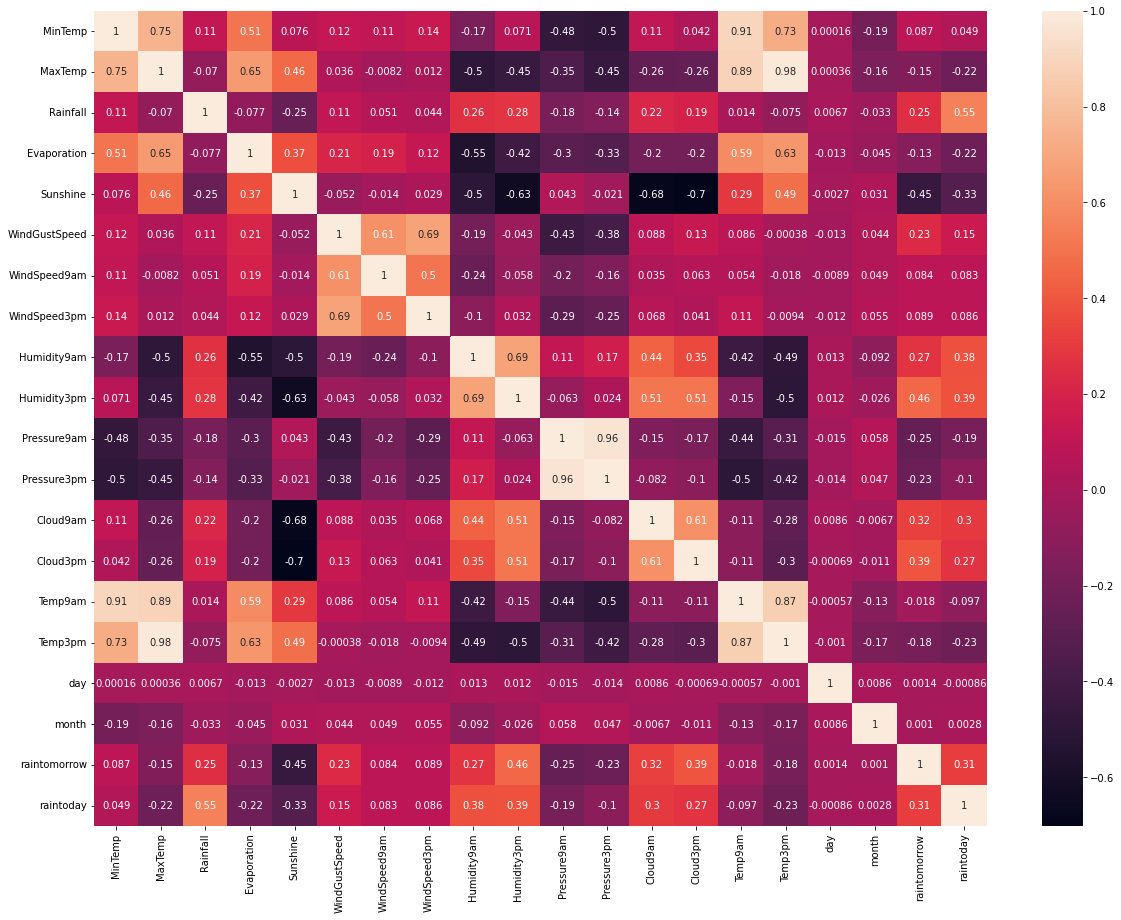

In [ ]:
#melihat korelasi numeric antar feature
plt.subplots(figsize=(20, 15))
sns.heatmap(df_new_.corr(), annot=True)

- Terdapat korelasi cukup tinggi antara temperature dan evaporation sebesar 0.5, hal ini menjelaskan bahwa suhu yang tinggi menyebabkan penguapan yang tinggi pula.
- Terdapat korelasi antara rainfall dan raintoday sebesar 0.5
- korelasi raintoday dengan raintomorrow sebesar 0.31
- korelasi humidity3pm dan raintomorrow agak tinggi sebesar 0.45

In [ ]:
#sns.pairplot(data=df_new_, vars=('MaxTemp','MinTemp','Pressure9am','Pressure3pm', 'Temp9am', 'Temp3pm', 'Evaporation'), hue='raintomorrow' )

korelasi di setiap kolom akan dilihat dari :
1. Distribusi data kolom tersebut dengan kolom target.
2. Chi-Square test.
    dilakukan dengan hypothesis testing dengan rules :
    - H0: tidak ada korelasi antara kolom dan kolom target
    - H1: ada korelasi antara kolom dan kolom target
    - P-Val < alpha (0.05) --> berhasil menolak H0
    - P-Val >= alpha (0.05) --> gagal menolak H0 --> kemungkinan ada korelasi --> masukkan kolom ke pemodelan

In [ ]:
df_new.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow', 'day', 'month', 'raintomorrow',
       'raintoday'],
      dtype='object')

Sebelum melihat korelasi tiap kolom dengan target, saya akan skalakan jumlah tiap kejadian hujan dan tidak hujan dari 0-1 menggunakan parameter density=True. Hal tersebut berguna pada dataset ini karena adanya imbalance data yang dapat menyebabkan bias dan ambiguitas pada analisis korelasi.

### 4.3.1. Melihat korelasi RainTomorrow dan Temperature

grafik korelasi

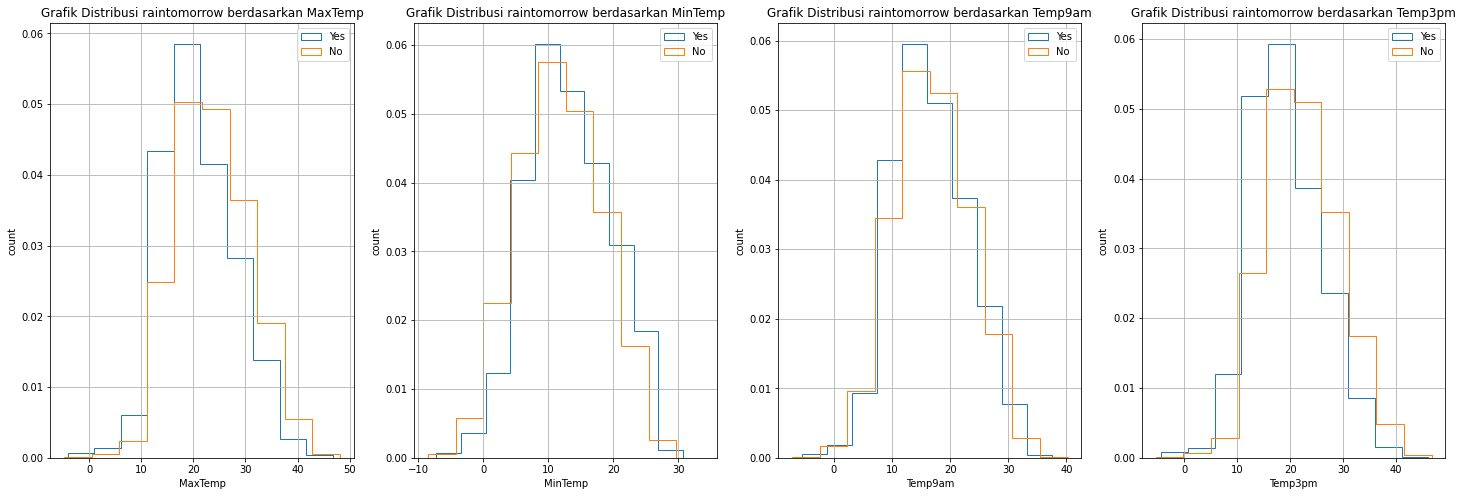

In [ ]:
fig, axes = plt.subplots(ncols=4,figsize=(25,8))
axes[0].hist(df_new[df_new['raintomorrow'] == 1].MaxTemp,
         histtype='step', label='Yes', density=True)
axes[0].hist(df_new[df_new['raintomorrow'] == 0].MaxTemp,
         histtype='step', label='No', density=True)
axes[0].set_title('Grafik Distribusi raintomorrow berdasarkan MaxTemp')
axes[0].legend()
axes[0].set_ylabel('count')
axes[0].set_xlabel('MaxTemp')
axes[0].grid()

axes[1].hist(df_new[df_new['raintomorrow'] == 1].MinTemp,
         histtype='step', label='Yes',  density=True)
axes[1].hist(df_new[df_new['raintomorrow'] == 0].MinTemp,
         histtype='step', label='No',  density=True)
axes[1].set_title('Grafik Distribusi raintomorrow berdasarkan MinTemp')
axes[1].legend()
axes[1].set_ylabel('count')
axes[1].set_xlabel('MinTemp')
axes[1].grid()

axes[2].hist(df_new[df_new['raintomorrow'] == 1].Temp9am,
         histtype='step', label='Yes',  density=True)
axes[2].hist(df_new[df_new['raintomorrow'] == 0].Temp9am,
         histtype='step', label='No',  density=True)
axes[2].set_title('Grafik Distribusi raintomorrow berdasarkan Temp9am')
axes[2].legend()
axes[2].set_ylabel('count')
axes[2].set_xlabel('Temp9am')
axes[2].grid()

axes[3].hist(df_new[df_new['raintomorrow'] == 1].Temp3pm,
         histtype='step', label='Yes',  density=True)
axes[3].hist(df_new[df_new['raintomorrow'] == 0].Temp3pm,
         histtype='step', label='No',  density=True)
axes[3].set_title('Grafik Distribusi raintomorrow berdasarkan Temp3pm')
axes[3].legend()
axes[3].set_ylabel('count')
axes[3].set_xlabel('Temp3pm')
axes[3].grid()

- terdapat pattern dimana suhu yang agak tinggi yaitu suhu 16-25 memiliki kemungkinan hujan lebih tinggi. Hal tersebut wajar karena suhu yang tinggi cenderung menyebabkan evaporasi tinggi yang butir airnya disimpan di awan dan diturunkan menjadi hujan.
- suhu yang tinggi (>25) cenderung memiliki kemungkinan hujan yang lebih rendah daripada tidak hujan. Asumsi saya adalah adanya pengaruh angin. Apabila suhu terlalu tinggi, maka angin akan berhembus dan mendorong awan dari lokasi tersebut ke lokasi lain sehingga hujannya di lokasi lain.
- Saya akan menggunakan kolom MinTemp sebagai perwakilan temperature untuk langkah selanjutnya karena dari 4 visualisasi, gap terbesar antara count visualisasi kemungkinan hujan dan tidak hujan terlihat pada kolom ini sehingga harapannya bisa lebih membedakan kelas hujan dan tiak hujan.

Chi-Square Temperature

In [ ]:
# Membuat contingency table
data_crosstab = pd.crosstab(df_new_['raintomorrow'],
                            df_new_['MinTemp'],
                           margins=True, margins_name="Total")

# Mendefinisikan significance level
alpha = 0.05

# Perhitungan Chisquare
chi_square = 0
rows = df_new_['raintomorrow'].unique()
columns = df_new_['MinTemp'].unique()
for i in columns:
    for j in rows:
        O = data_crosstab[i][j]
        E = data_crosstab[i]['Total'] * data_crosstab['Total'][j] / data_crosstab['Total']['Total']
        chi_square += (O-E)**2/E

# Pendekatan dengan p-value
print("Approach 1: The p-value approach to hypothesis testing in the decision rule")
p_value = 1 - stats.chi2.cdf(chi_square, (len(rows)-1)*(len(columns)-1))
conclusion = "Failed to reject the null hypothesis."
if p_value <= alpha:
    conclusion = "Null Hypothesis is rejected."
        
print("chisquare-score is:", chi_square, " and p value is:", p_value)
print(conclusion)
    
# Pendekatan dengan critical value
print("\n--------------------------------------------------------------------------------------")
print("Approach 2: The critical value approach to hypothesis testing in the decision rule")
critical_value = stats.chi2.ppf(1-alpha, (len(rows)-1)*(len(columns)-1))
conclusion = "Failed to reject the null hypothesis."
if chi_square > critical_value:
    conclusion = "Null Hypothesis is rejected."
        
print("chisquare-score is:", chi_square, " and critical value is:", critical_value)
print(conclusion)

Approach 1: The p-value approach to hypothesis testing in the decision rule
chisquare-score is: 1277.8256590233011  and p value is: 0.0
Null Hypothesis is rejected.

--------------------------------------------------------------------------------------
Approach 2: The critical value approach to hypothesis testing in the decision rule
chisquare-score is: 1277.8256590233011  and critical value is: 391.43871911219264
Null Hypothesis is rejected.


berdasarkan perhitungan chi-square test, terdapat kemungkinan temperature berkorelasi dengan target. Kemudian berdasarkan distribusinya di grafik korelasi, terdapat pattern yang menarik antara temperature dan target.

conclusion : MinTemp dimasukkan sebagai fitur ke model ML.

### 4.3.2. Melihat korelasi raintomorrow dan Evaporation

grafik korelasi

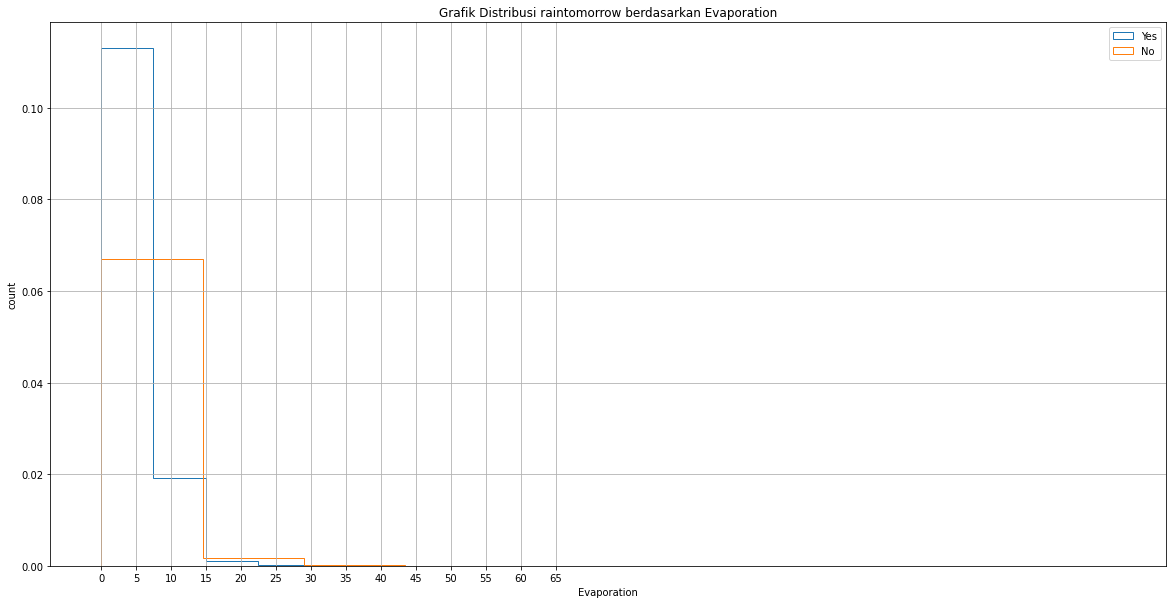

In [ ]:
fig, axes = plt.subplots(ncols=1,figsize=(20,10))
axes.hist(df_new[df_new['raintomorrow'] == 1].Evaporation,
         histtype='step', label='Yes', density=True)
axes.hist(df_new[df_new['raintomorrow'] == 0].Evaporation,
         histtype='step', label='No', density=True)
axes.set_title('Grafik Distribusi raintomorrow berdasarkan Evaporation')
axes.legend()
axes.set_ylabel('count')
axes.set_xlabel('Evaporation')
axes.set_xticks(np.arange(0, 70, 5))
axes.grid()

Berdasarkan grafik:
- evaporasi 0-5 memiliki probabilitas lebih besar untuk terjadi hujan besok.
- asumsi saya evaporasi >5 adalah terkait analisis sebelumnya tentang suhu, dan angin yang menyebabkan probabilitas terjadinya hujan besok lebih kecil.
- pattern distribusi target hampir sama untuk kolom evaporasi ini maka kurang cocok untuk dijadikan fitur.

Chi-Square Evaporation

In [ ]:
# Membuat contingency table
data_crosstab = pd.crosstab(df_new_['raintomorrow'],
                            df_new_['Evaporation'],
                           margins=True, margins_name="Total")

# Mendefinisikan significance level
alpha = 0.05

# Perhitungan Chisquare
chi_square = 0
rows = df_new_['raintomorrow'].unique()
columns = df_new_['Evaporation'].unique()
for i in columns:
    for j in rows:
        O = data_crosstab[i][j]
        E = data_crosstab[i]['Total'] * data_crosstab['Total'][j] / data_crosstab['Total']['Total']
        chi_square += (O-E)**2/E

# Pendekatan dengan p-value
print("Approach 1: The p-value approach to hypothesis testing in the decision rule")
p_value = 1 - stats.chi2.cdf(chi_square, (len(rows)-1)*(len(columns)-1))
conclusion = "Failed to reject the null hypothesis."
if p_value <= alpha:
    conclusion = "Null Hypothesis is rejected."
        
print("chisquare-score is:", chi_square, " and p value is:", p_value)
print(conclusion)
    
# Pendekatan dengan critical value
print("\n--------------------------------------------------------------------------------------")
print("Approach 2: The critical value approach to hypothesis testing in the decision rule")
critical_value = stats.chi2.ppf(1-alpha, (len(rows)-1)*(len(columns)-1))
conclusion = "Failed to reject the null hypothesis."
if chi_square > critical_value:
    conclusion = "Null Hypothesis is rejected."
        
print("chisquare-score is:", chi_square, " and critical value is:", critical_value)
print(conclusion)

Approach 1: The p-value approach to hypothesis testing in the decision rule
chisquare-score is: 1386.4242992379538  and p value is: 0.0
Null Hypothesis is rejected.

--------------------------------------------------------------------------------------
Approach 2: The critical value approach to hypothesis testing in the decision rule
chisquare-score is: 1386.4242992379538  and critical value is: 296.4659101541689
Null Hypothesis is rejected.


berdasarkan perhitungan chi-square test, terdapat kemungkinan Evaporation berkorelasi dengan target. Akan tetapi, berdasarkan distribusinya di grafik korelasi, Evaporation kurang cocok dijadikan fitur.

conclusion : Evaporation tidak dimasukkan sebagai fitur ke model ML.

### 4.3.3. Melihat korelasi  raintomorrow dan WindGustDir

grafik korelasi

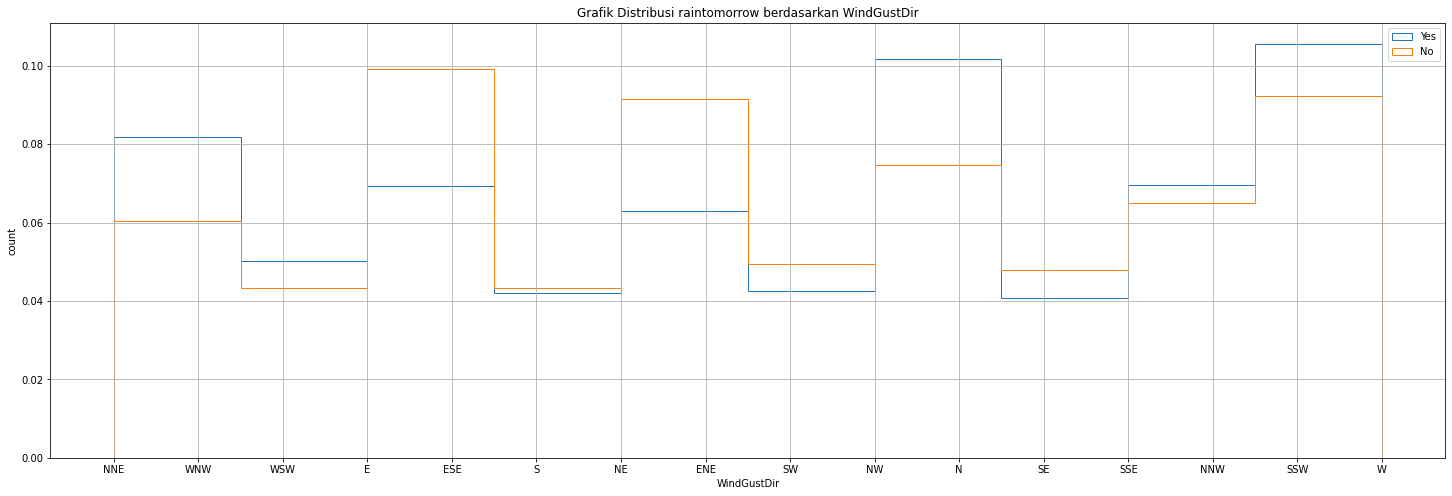

In [ ]:
fig, axes = plt.subplots(ncols=1,figsize=(25,8))
axes.hist(df_new_[df_new_['raintomorrow'] == 1].WindGustDir,
         histtype='step', label='Yes', density=True)
axes.hist(df_new_[df_new_['raintomorrow'] == 0].WindGustDir,
         histtype='step', label='No', density=True)
axes.set_title('Grafik Distribusi raintomorrow berdasarkan WindGustDir')
axes.legend()
axes.set_ylabel('count')
axes.set_xlabel('WindGustDir')
axes.grid()

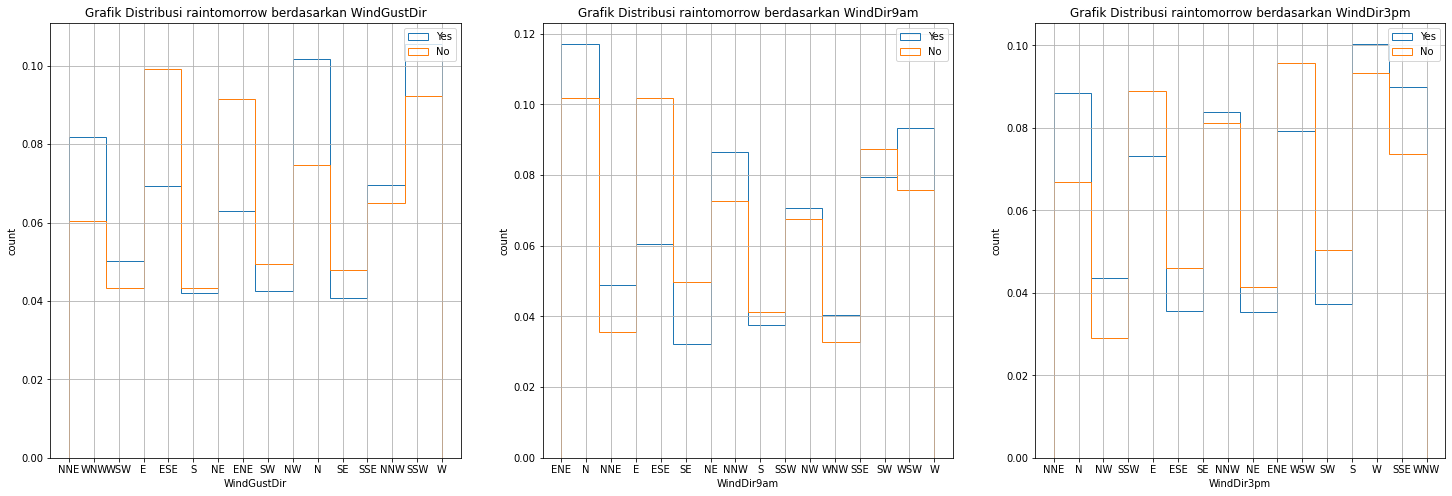

In [ ]:
fig, axes = plt.subplots(ncols=3,figsize=(25,8))
axes[0].hist(df_new_[df_new_['raintomorrow'] == 1].WindGustDir,
         histtype='step', label='Yes', density=True)
axes[0].hist(df_new_[df_new_['raintomorrow'] == 0].WindGustDir,
         histtype='step', label='No', density=True)
axes[0].set_title('Grafik Distribusi raintomorrow berdasarkan WindGustDir')
axes[0].legend()
axes[0].set_ylabel('count')
axes[0].set_xlabel('WindGustDir')
axes[0].grid()

axes[1].hist(df_new_[df_new_['raintomorrow'] == 1].WindDir9am,
         histtype='step', label='Yes',  density=True)
axes[1].hist(df_new_[df_new_['raintomorrow'] == 0].WindDir9am,
         histtype='step', label='No',  density=True)
axes[1].set_title('Grafik Distribusi raintomorrow berdasarkan WindDir9am')
axes[1].legend()
axes[1].set_ylabel('count')
axes[1].set_xlabel('WindDir9am')
axes[1].grid()

axes[2].hist(df_new_[df_new_['raintomorrow'] == 1].WindDir3pm,
         histtype='step', label='Yes',  density=True)
axes[2].hist(df_new_[df_new_['raintomorrow'] == 0].WindDir3pm,
         histtype='step', label='No',  density=True)
axes[2].set_title('Grafik Distribusi raintomorrow berdasarkan WindDir3pm')
axes[2].legend()
axes[2].set_ylabel('count')
axes[2].set_xlabel('WindDir3pm')
axes[2].grid()

Berdasarkan grafik:
- probabilitas besok akan hujan dari dari 3 visualisasi tersebut berbeda-beda distribusinya. 
- pada visualisasi umum arah mata angin, hari dengan arah angin dari E, S, N, NNW, dan W memiliki probabilitas lebih besar untuk terjadi hujan esok harinya.

Chi-Square education_level

In [ ]:
# Membuat contingency table
data_crosstab = pd.crosstab(df_new_['RainTomorrow'],
                            df_new_['WindGustDir'],
                           margins=True, margins_name="Total")

# Mendefinisikan significance level
alpha = 0.05

# Perhitungan Chisquare
chi_square = 0
rows = df_new_['RainTomorrow'].unique()
columns = df_new_['WindGustDir'].unique()
for i in columns:
    for j in rows:
        O = data_crosstab[i][j]
        E = data_crosstab[i]['Total'] * data_crosstab['Total'][j] / data_crosstab['Total']['Total']
        chi_square += (O-E)**2/E

# Pendekatan dengan p-value
print("Approach 1: The p-value approach to hypothesis testing in the decision rule")
p_value = 1 - stats.chi2.cdf(chi_square, (len(rows)-1)*(len(columns)-1))
conclusion = "Failed to reject the null hypothesis."
if p_value <= alpha:
    conclusion = "Null Hypothesis is rejected."
        
print("chisquare-score is:", chi_square, " and p value is:", p_value)
print(conclusion)
    
# Pendekatan dengan critical value
print("\n--------------------------------------------------------------------------------------")
print("Approach 2: The critical value approach to hypothesis testing in the decision rule")
critical_value = stats.chi2.ppf(1-alpha, (len(rows)-1)*(len(columns)-1))
conclusion = "Failed to reject the null hypothesis."
if chi_square > critical_value:
    conclusion = "Null Hypothesis is rejected."
        
print("chisquare-score is:", chi_square, " and critical value is:", critical_value)
print(conclusion)

Approach 1: The p-value approach to hypothesis testing in the decision rule
chisquare-score is: 745.5503161348491  and p value is: 0.0
Null Hypothesis is rejected.

--------------------------------------------------------------------------------------
Approach 2: The critical value approach to hypothesis testing in the decision rule
chisquare-score is: 745.5503161348491  and critical value is: 24.995790139728616
Null Hypothesis is rejected.


berdasarkan perhitungan chi-square test, terdapat kemungkinan arah mata angin berkorelasi dengan target. Akan tetapi, adanya perbedaan distribusi arah mata angin dikhawatirkan akan memengaruhi hasil pemodelan. Maka kolom ini kurang cocok untuk digunakan sebagai fitur.

conclusion : WindGustDir dimasukkan sebagai fitur ke model ML.

### 4.3.4. Melihat korelasi raintomorrow dan WindSpeed

grafik korelasi

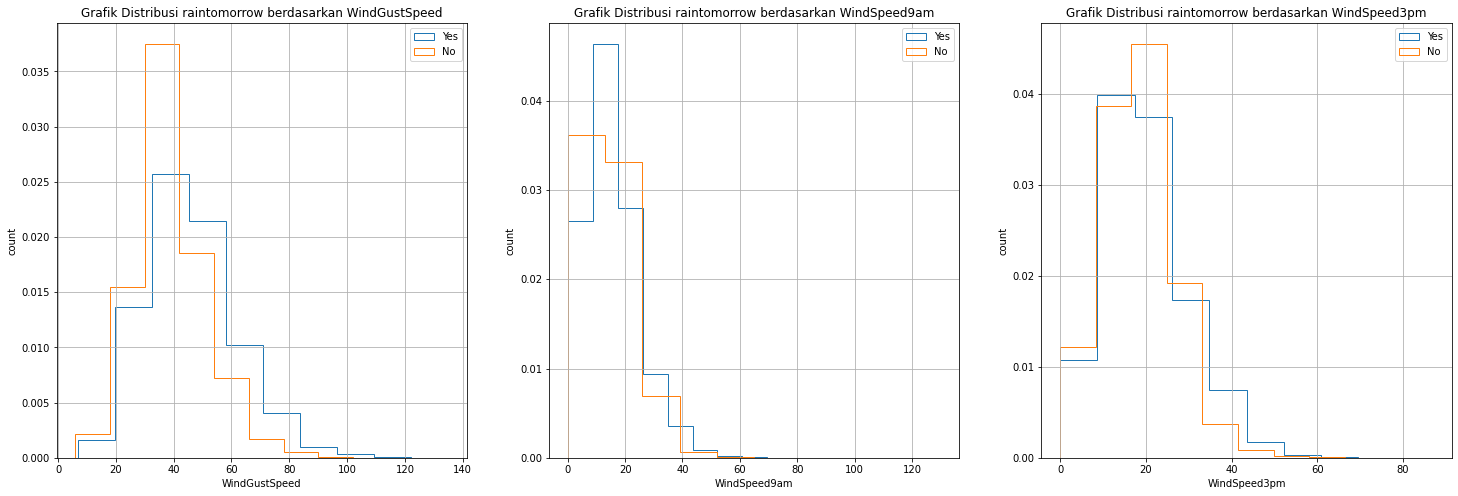

In [ ]:
fig, axes = plt.subplots(ncols=3,figsize=(25,8))
axes[0].hist(df_new[df_new['raintomorrow'] == 1].WindGustSpeed,
         histtype='step', label='Yes', density=True)
axes[0].hist(df_new[df_new['raintomorrow'] == 0].WindGustSpeed,
         histtype='step', label='No', density=True)
axes[0].set_title('Grafik Distribusi raintomorrow berdasarkan WindGustSpeed')
axes[0].legend()
axes[0].set_ylabel('count')
axes[0].set_xlabel('WindGustSpeed')
axes[0].grid()

axes[1].hist(df_new[df_new['raintomorrow'] == 1].WindSpeed9am,
         histtype='step', label='Yes',  density=True)
axes[1].hist(df_new[df_new['raintomorrow'] == 0].WindSpeed9am,
         histtype='step', label='No',  density=True)
axes[1].set_title('Grafik Distribusi raintomorrow berdasarkan WindSpeed9am')
axes[1].legend()
axes[1].set_ylabel('count')
axes[1].set_xlabel('WindSpeed9am')
axes[1].grid()

axes[2].hist(df_new[df_new['raintomorrow'] == 1].WindSpeed3pm,
         histtype='step', label='Yes',  density=True)
axes[2].hist(df_new[df_new['raintomorrow'] == 0].WindSpeed3pm,
         histtype='step', label='No',  density=True)
axes[2].set_title('Grafik Distribusi raintomorrow berdasarkan WindSpeed3pm')
axes[2].legend()
axes[2].set_ylabel('count')
axes[2].set_xlabel('WindSpeed3pm')
axes[2].grid()

Berdasarkan grafik:
- terdapat pattern dimana kecepatan angin maksimal pada angka >40 memiliki probabilitas keesokan hari akan hujan lebih tinggi daripada tidak hujan.
- Probabilitas besok hujan yang lebih tinggi adalah di saat kecepatan angin pada jam 9 pagi bekisar antara 20-50 knots dan pada jam 3 sore di angka 15-60 knots.
- Saya akan menggunakan kolom WindGustSpeed sebagai perwakilan kecepatan angin untuk langkah selanjutnya karena dari 3 visualisasi, gap terbesar antara count visualisasi kemungkinan hujan dan tidak hujan terlihat pada kolom ini sehingga harapannya bisa lebih membedakan kelas hujan dan tiak hujan.

Chi-Square WindGustSpeed  

In [ ]:
# Membuat contingency table
data_crosstab = pd.crosstab(df_new_['RainTomorrow'],
                            df_new_['WindGustSpeed'],
                           margins=True, margins_name="Total")

# Mendefinisikan significance level
alpha = 0.05

# Perhitungan Chisquare
chi_square = 0
rows = df_new_['RainTomorrow'].unique()
columns = df_new_['WindGustSpeed'].unique()
for i in columns:
    for j in rows:
        O = data_crosstab[i][j]
        E = data_crosstab[i]['Total'] * data_crosstab['Total'][j] / data_crosstab['Total']['Total']
        chi_square += (O-E)**2/E

# Pendekatan dengan p-value
print("Approach 1: The p-value approach to hypothesis testing in the decision rule")
p_value = 1 - stats.chi2.cdf(chi_square, (len(rows)-1)*(len(columns)-1))
conclusion = "Failed to reject the null hypothesis."
if p_value <= alpha:
    conclusion = "Null Hypothesis is rejected."
        
print("chisquare-score is:", chi_square, " and p value is:", p_value)
print(conclusion)
    
# Pendekatan dengan critical value
print("\n--------------------------------------------------------------------------------------")
print("Approach 2: The critical value approach to hypothesis testing in the decision rule")
critical_value = stats.chi2.ppf(1-alpha, (len(rows)-1)*(len(columns)-1))
conclusion = "Failed to reject the null hypothesis."
if chi_square > critical_value:
    conclusion = "Null Hypothesis is rejected."
        
print("chisquare-score is:", chi_square, " and critical value is:", critical_value)
print(conclusion)

Approach 1: The p-value approach to hypothesis testing in the decision rule
chisquare-score is: 3405.106171736434  and p value is: 0.0
Null Hypothesis is rejected.

--------------------------------------------------------------------------------------
Approach 2: The critical value approach to hypothesis testing in the decision rule
chisquare-score is: 3405.106171736434  and critical value is: 79.08194448784874
Null Hypothesis is rejected.


berdasarkan perhitungan chi-square test, terdapat kemungkinan kecepatan angin berkorelasi dengan target. Kemudian berdasarkan distribusinya di grafik korelasi, terdapat pattern yang menarik antara kecepatan angin dan target.

conclusion : WindGustSpeed dimasukkan sebagai fitur ke model ML.

### 4.3.5. Melihat korelasi raintomorrow dan Humidity

analisis korelasi dengan pay_1 mewakili analisis dengan pay_n. n = payment bulan tertentu.

grafik korelasi

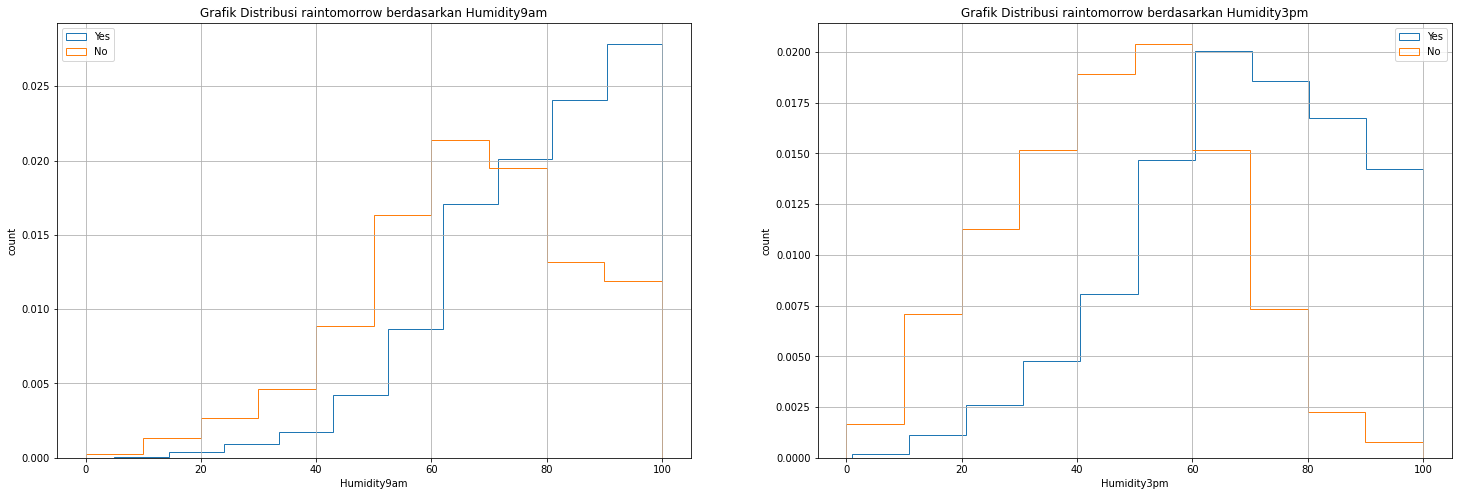

In [ ]:
fig, axes = plt.subplots(ncols=2,figsize=(25,8))
axes[0].hist(df_new[df_new['raintomorrow'] == 1].Humidity9am,
         histtype='step', label='Yes', density=True)
axes[0].hist(df_new[df_new['raintomorrow'] == 0].Humidity9am,
         histtype='step', label='No', density=True)
axes[0].set_title('Grafik Distribusi raintomorrow berdasarkan Humidity9am')
axes[0].legend()
axes[0].set_ylabel('count')
axes[0].set_xlabel('Humidity9am')
axes[0].grid()

axes[1].hist(df_new[df_new['raintomorrow'] == 1].Humidity3pm,
         histtype='step', label='Yes',  density=True)
axes[1].hist(df_new[df_new['raintomorrow'] == 0].Humidity3pm,
         histtype='step', label='No',  density=True)
axes[1].set_title('Grafik Distribusi raintomorrow berdasarkan Humidity3pm')
axes[1].legend()
axes[1].set_ylabel('count')
axes[1].set_xlabel('Humidity3pm')
axes[1].grid()

Berdasarkan grafik:
- terdapat pattern yang mirip dari kelembaban udara pada jam 9 pagi dan 3 sore. Semakin tinggi kelembaban udaranya, maka semakin tinggi juga kemungkinan untuk hujan esok harinya.
- Saya akan menggunakan kolom Humidity3pm sebagai perwakilan karena menunjukkan gap distribusi raintomorrow yang lebih besar sehingga harapannya bisa lebih membedakan kelas hujan dan tidak hujan.

Chi-Square Humidity

In [ ]:
# Membuat contingency table
data_crosstab = pd.crosstab(df_new_['RainTomorrow'],
                            df_new_['Humidity3pm'],
                           margins=True, margins_name="Total")

# Mendefinisikan significance level
alpha = 0.05

# Perhitungan Chisquare
chi_square = 0
rows = df_new_['RainTomorrow'].unique()
columns = df_new_['Humidity3pm'].unique()
for i in columns:
    for j in rows:
        O = data_crosstab[i][j]
        E = data_crosstab[i]['Total'] * data_crosstab['Total'][j] / data_crosstab['Total']['Total']
        chi_square += (O-E)**2/E

# Pendekatan dengan p-value
print("Approach 1: The p-value approach to hypothesis testing in the decision rule")
p_value = 1 - stats.chi2.cdf(chi_square, (len(rows)-1)*(len(columns)-1))
conclusion = "Failed to reject the null hypothesis."
if p_value <= alpha:
    conclusion = "Null Hypothesis is rejected."
        
print("chisquare-score is:", chi_square, " and p value is:", p_value)
print(conclusion)
    
# Pendekatan dengan critical value
print("\n--------------------------------------------------------------------------------------")
print("Approach 2: The critical value approach to hypothesis testing in the decision rule")
critical_value = stats.chi2.ppf(1-alpha, (len(rows)-1)*(len(columns)-1))
conclusion = "Failed to reject the null hypothesis."
if chi_square > critical_value:
    conclusion = "Null Hypothesis is rejected."
        
print("chisquare-score is:", chi_square, " and critical value is:", critical_value)
print(conclusion)

Approach 1: The p-value approach to hypothesis testing in the decision rule
chisquare-score is: 15335.65549796918  and p value is: 0.0
Null Hypothesis is rejected.

--------------------------------------------------------------------------------------
Approach 2: The critical value approach to hypothesis testing in the decision rule
chisquare-score is: 15335.65549796918  and critical value is: 124.34211340400407
Null Hypothesis is rejected.


berdasarkan perhitungan chi-square test, terdapat kemungkinan kelembaban udara berkorelasi dengan target. Kemudian berdasarkan distribusinya di grafik korelasi, terdapat pattern yang menarik antara kelembaban udara dan target.

conclusion : humidity3pm akan dimasukkan sebagai fitur ke model ML.

### 4.3.6. Melihat korelasi raintomorrow dan Pressure

grafik korelasi

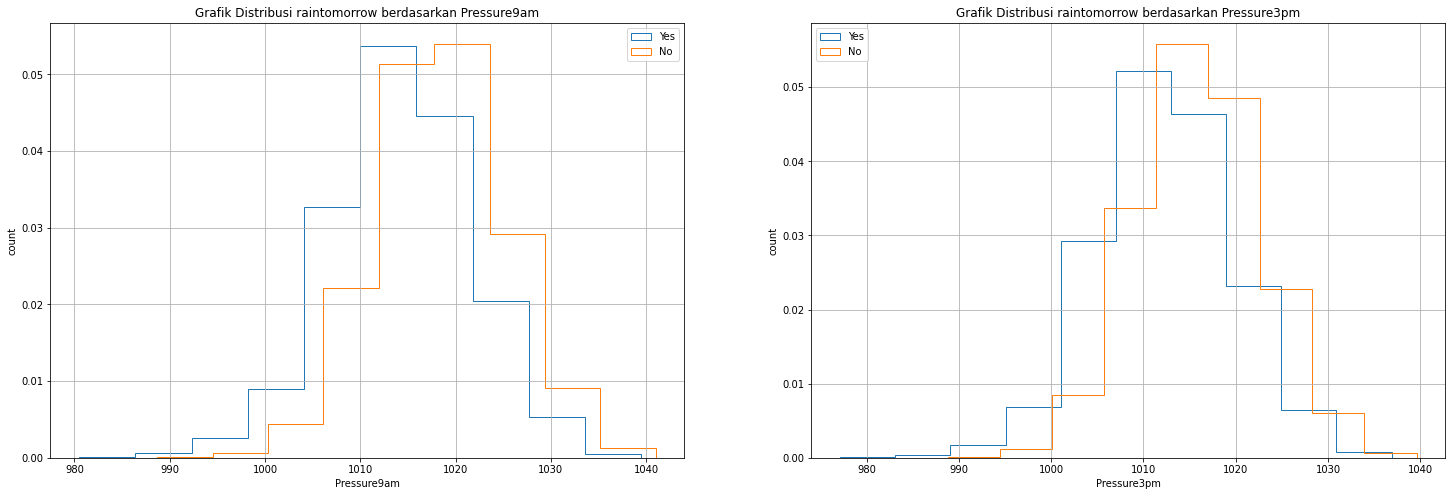

In [ ]:
fig, axes = plt.subplots(ncols=2,figsize=(25,8))
axes[0].hist(df_new[df_new['raintomorrow'] == 1].Pressure9am,
         histtype='step', label='Yes', density=True)
axes[0].hist(df_new[df_new['raintomorrow'] == 0].Pressure9am,
         histtype='step', label='No', density=True)
axes[0].set_title('Grafik Distribusi raintomorrow berdasarkan Pressure9am')
axes[0].legend()
axes[0].set_ylabel('count')
axes[0].set_xlabel('Pressure9am')
axes[0].grid()

axes[1].hist(df_new[df_new['raintomorrow'] == 1].Pressure3pm,
         histtype='step', label='Yes',  density=True)
axes[1].hist(df_new[df_new['raintomorrow'] == 0].Pressure3pm,
         histtype='step', label='No',  density=True)
axes[1].set_title('Grafik Distribusi raintomorrow berdasarkan Pressure3pm')
axes[1].legend()
axes[1].set_ylabel('count')
axes[1].set_xlabel('Pressure3pm')
axes[1].grid()

Berdasarkan grafik:
- pattern pressure oleh besok hujan dan tidak hujan memiliki bentuk yang sama. Hal ini mengindikasikan bahwa pressure kurang berkorelasi terhadap terjadinya hujan esok hari.

Chi-Square Humidity

In [ ]:
# Membuat contingency table
data_crosstab = pd.crosstab(df_new_['RainTomorrow'],
                            df_new_['Pressure9am'],
                           margins=True, margins_name="Total")

# Mendefinisikan significance level
alpha = 0.05

# Perhitungan Chisquare
chi_square = 0
rows = df_new_['RainTomorrow'].unique()
columns = df_new_['Pressure9am'].unique()
for i in columns:
    for j in rows:
        O = data_crosstab[i][j]
        E = data_crosstab[i]['Total'] * data_crosstab['Total'][j] / data_crosstab['Total']['Total']
        chi_square += (O-E)**2/E

# Pendekatan dengan p-value
print("Approach 1: The p-value approach to hypothesis testing in the decision rule")
p_value = 1 - stats.chi2.cdf(chi_square, (len(rows)-1)*(len(columns)-1))
conclusion = "Failed to reject the null hypothesis."
if p_value <= alpha:
    conclusion = "Null Hypothesis is rejected."
        
print("chisquare-score is:", chi_square, " and p value is:", p_value)
print(conclusion)
    
# Pendekatan dengan critical value
print("\n--------------------------------------------------------------------------------------")
print("Approach 2: The critical value approach to hypothesis testing in the decision rule")
critical_value = stats.chi2.ppf(1-alpha, (len(rows)-1)*(len(columns)-1))
conclusion = "Failed to reject the null hypothesis."
if chi_square > critical_value:
    conclusion = "Null Hypothesis is rejected."
        
print("chisquare-score is:", chi_square, " and critical value is:", critical_value)
print(conclusion)

Approach 1: The p-value approach to hypothesis testing in the decision rule
chisquare-score is: 4696.276025116058  and p value is: 0.0
Null Hypothesis is rejected.

--------------------------------------------------------------------------------------
Approach 2: The critical value approach to hypothesis testing in the decision rule
chisquare-score is: 4696.276025116058  and critical value is: 556.2826956174218
Null Hypothesis is rejected.


berdasarkan perhitangan chi-square test, diambil kesimpulan bahwa bisa jadi tidak ada korelasi antara raintomorrow dengan pressure. Kemudian, berdasarkan grafik juga mengindikasikan kolom ini tidak cocok untuk prediksi raintomorrow.

conclusion : Pressure tidak dimasukkan sebagai fitur ke model ML

### 4.3.7. Melihat korelasi raintomorrow dan cloud

grafik korelasi

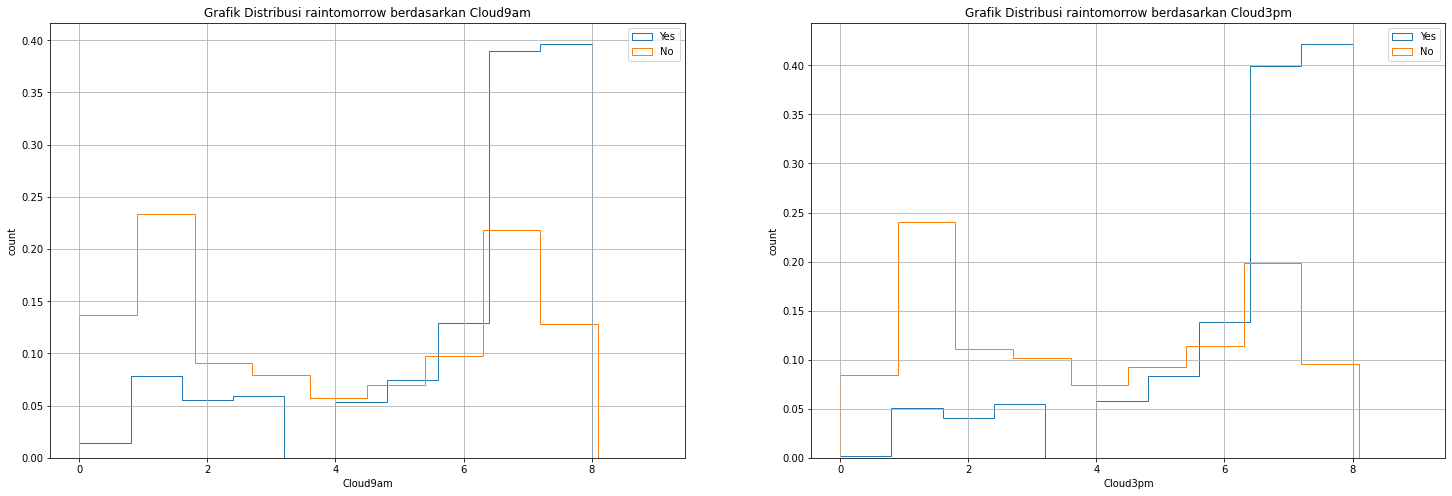

In [ ]:
fig, axes = plt.subplots(ncols=2,figsize=(25,8))
axes[0].hist(df_new[df_new['raintomorrow'] == 1].Cloud9am,
         histtype='step', label='Yes', density=True)
axes[0].hist(df_new[df_new['raintomorrow'] == 0].Cloud9am,
         histtype='step', label='No', density=True)
axes[0].set_title('Grafik Distribusi raintomorrow berdasarkan Cloud9am')
axes[0].legend()
axes[0].set_ylabel('count')
axes[0].set_xlabel('Cloud9am')
axes[0].grid()

axes[1].hist(df_new[df_new['raintomorrow'] == 1].Cloud3pm,
         histtype='step', label='Yes',  density=True)
axes[1].hist(df_new[df_new['raintomorrow'] == 0].Cloud3pm,
         histtype='step', label='No',  density=True)
axes[1].set_title('Grafik Distribusi raintomorrow berdasarkan Cloud3pm')
axes[1].legend()
axes[1].set_ylabel('count')
axes[1].set_xlabel('Cloud3pm')
axes[1].grid()

Berdasarkan grafik:
- terdapat pattern yang sangat menarik dimana tutupan awan yang tinggi, probabilitasnya untuk hujan besok juga sangat tinggi. Begitu pula sebaliknya.
- pattern cloud di jam 9 pagi dan jam 3 sore mirip. Saya akan menggunakan Cloud9am untuk perwakilan.

Chi-Square pay_amt_1

In [ ]:
# Membuat contingency table
data_crosstab = pd.crosstab(df_new_['RainTomorrow'],
                            df_new_['Cloud9am'],
                           margins=True, margins_name="Total")

# Mendefinisikan significance level
alpha = 0.05

# Perhitungan Chisquare
chi_square = 0
rows = df_new_['RainTomorrow'].unique()
columns = df_new_['Cloud9am'].unique()
for i in columns:
    for j in rows:
        O = data_crosstab[i][j]
        E = data_crosstab[i]['Total'] * data_crosstab['Total'][j] / data_crosstab['Total']['Total']
        chi_square += (O-E)**2/E

# Pendekatan dengan p-value
print("Approach 1: The p-value approach to hypothesis testing in the decision rule")
p_value = 1 - stats.chi2.cdf(chi_square, (len(rows)-1)*(len(columns)-1))
conclusion = "Failed to reject the null hypothesis."
if p_value <= alpha:
    conclusion = "Null Hypothesis is rejected."
        
print("chisquare-score is:", chi_square, " and p value is:", p_value)
print(conclusion)
    
# Pendekatan dengan critical value
print("\n--------------------------------------------------------------------------------------")
print("Approach 2: The critical value approach to hypothesis testing in the decision rule")
critical_value = stats.chi2.ppf(1-alpha, (len(rows)-1)*(len(columns)-1))
conclusion = "Failed to reject the null hypothesis."
if chi_square > critical_value:
    conclusion = "Null Hypothesis is rejected."
        
print("chisquare-score is:", chi_square, " and critical value is:", critical_value)
print(conclusion)

Approach 1: The p-value approach to hypothesis testing in the decision rule
chisquare-score is: 6435.902827120812  and p value is: 0.0
Null Hypothesis is rejected.

--------------------------------------------------------------------------------------
Approach 2: The critical value approach to hypothesis testing in the decision rule
chisquare-score is: 6435.902827120812  and critical value is: 15.50731305586545
Null Hypothesis is rejected.


berdasarkan perhitungan chi-square test, terdapat kemungkinan tutupan awan berkorelasi dengan target. Kemudian berdasarkan distribusinya di grafik korelasi, terdapat pattern yang menarik antara tutupan awan dan target.

conclusion : Cloud9am akan dimasukkan sebagai fitur ke model ML.

### 4.3.8. Melihat korelasi raintomorrow dan month

grafik korelasi

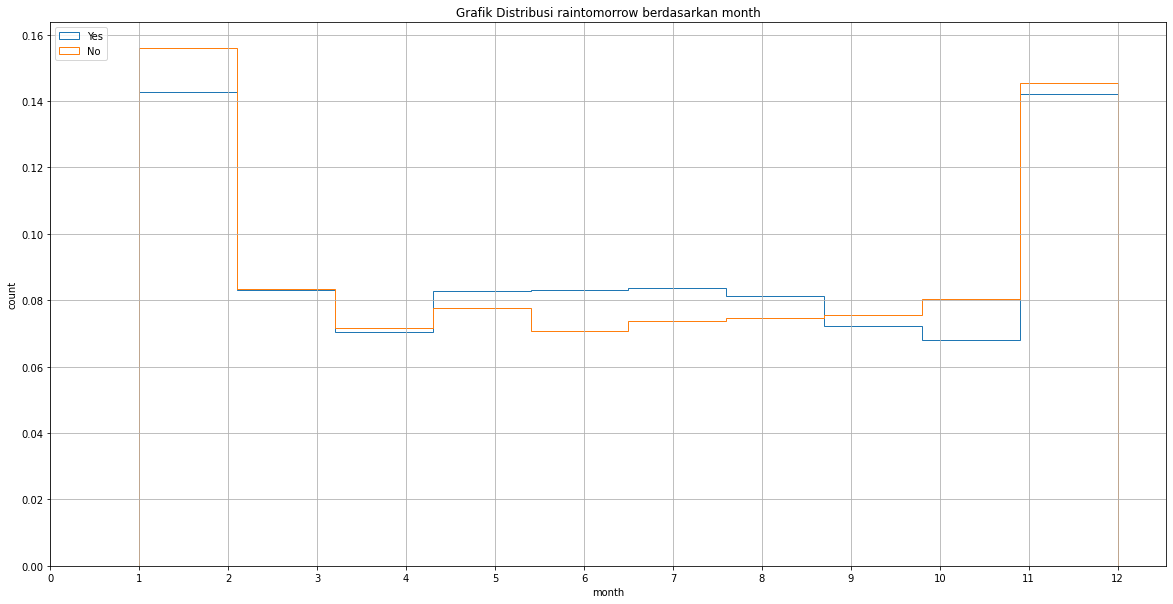

In [ ]:
fig, axes = plt.subplots(ncols=1,figsize=(20,10))
axes.hist(df_new_[df_new_['RainTomorrow'] == 'Yes'].month,
         histtype='step', label='Yes', density=True)
axes.hist(df_new_[df_new_['RainTomorrow'] == 'No'].month,
         histtype='step', label='No', density=True)
axes.set_title('Grafik Distribusi raintomorrow berdasarkan month')
axes.legend()
axes.set_ylabel('count')
axes.set_xlabel('month')
axes.set_xticks(np.arange(0, 13, 1))
axes.grid()

Berdasarkan grafik:
- bulan 1-6 memiliki probabilitas raintomorrow lebih tinggi daripada bulan lainnya. Hal tersebut sesuai dengan sumber [disini](https://www.bushmantanks.com.au/100-years-of-australian-rainfall/#:~:text=As%20can%20be%20seen%20in%20the%20graph%20below%2C%20January%20to%20March%20were%20extremely%20wet%20months%20for%20Australia%20in%202021.%20While%20January%20is%20normally%20the%20wettest%20month%20in%20Australia)
bahwa bulan basah terjadi dari November-April dan puncak bulan basah ada di bulan Januari.

Chi-Square month

In [ ]:
# Membuat contingency table
data_crosstab = pd.crosstab(df_new_['RainTomorrow'],
                            df_new_['month'],
                           margins=True, margins_name="Total")

# Mendefinisikan significance level
alpha = 0.05

# Perhitungan Chisquare
chi_square = 0
rows = df_new_['RainTomorrow'].unique()
columns = df_new_['month'].unique()
for i in columns:
    for j in rows:
        O = data_crosstab[i][j]
        E = data_crosstab[i]['Total'] * data_crosstab['Total'][j] / data_crosstab['Total']['Total']
        chi_square += (O-E)**2/E

# Pendekatan dengan p-value
print("Approach 1: The p-value approach to hypothesis testing in the decision rule")
p_value = 1 - stats.chi2.cdf(chi_square, (len(rows)-1)*(len(columns)-1))
conclusion = "Failed to reject the null hypothesis."
if p_value <= alpha:
    conclusion = "Null Hypothesis is rejected."
        
print("chisquare-score is:", chi_square, " and p value is:", p_value)
print(conclusion)
    
# Pendekatan dengan critical value
print("\n--------------------------------------------------------------------------------------")
print("Approach 2: The critical value approach to hypothesis testing in the decision rule")
critical_value = stats.chi2.ppf(1-alpha, (len(rows)-1)*(len(columns)-1))
conclusion = "Failed to reject the null hypothesis."
if chi_square > critical_value:
    conclusion = "Null Hypothesis is rejected."
        
print("chisquare-score is:", chi_square, " and critical value is:", critical_value)
print(conclusion)

Approach 1: The p-value approach to hypothesis testing in the decision rule
chisquare-score is: 81.06031737987938  and p value is: 9.200418205068672e-13
Null Hypothesis is rejected.

--------------------------------------------------------------------------------------
Approach 2: The critical value approach to hypothesis testing in the decision rule
chisquare-score is: 81.06031737987938  and critical value is: 19.67513757268249
Null Hypothesis is rejected.


berdasarkan perhitangan chi-square test, diambil kesimpulan bahwa bisa jadi terdapat korelasi antara raintomorrow dengan month. 

conclusion : month dimasukkan sebagai fitur ke model ML

### 4.3.9. Melihat korelasi raintomorrow dan rainfall

grafik korelasi

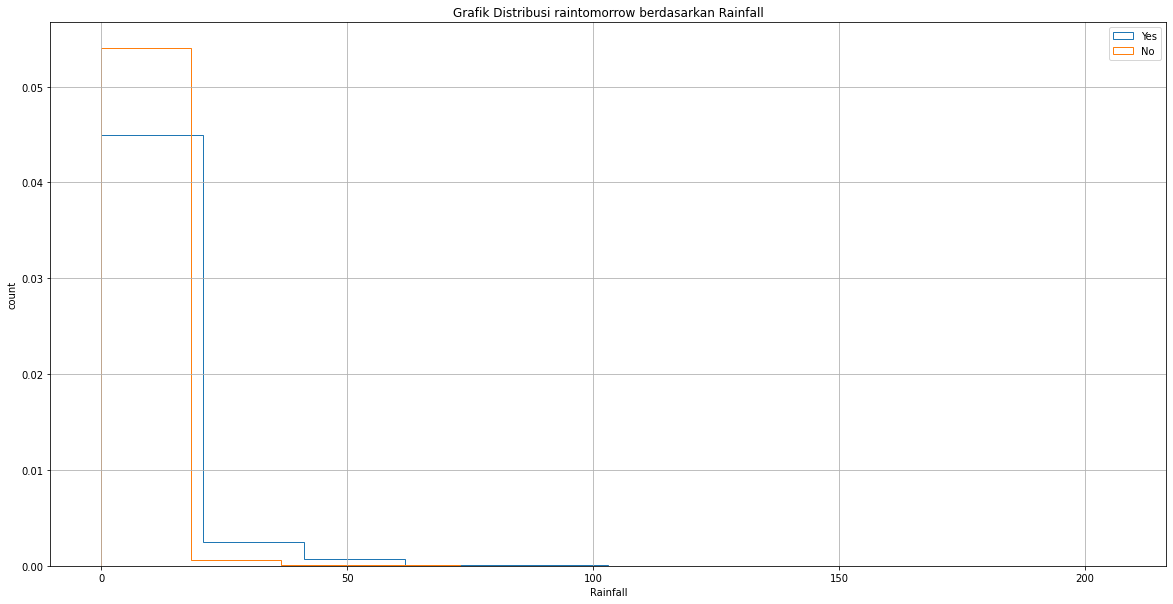

In [ ]:
fig, axes = plt.subplots(ncols=1,figsize=(20,10))
axes.hist(df_new_[df_new_['RainTomorrow'] == 'Yes'].Rainfall,
         histtype='step', label='Yes', density=True)
axes.hist(df_new_[df_new_['RainTomorrow'] == 'No'].Rainfall,
         histtype='step', label='No', density=True)
axes.set_title('Grafik Distribusi raintomorrow berdasarkan Rainfall')
axes.legend()
axes.set_ylabel('count')
axes.set_xlabel('Rainfall')
#axes.set_xticks(np.arange(0, 13, 1))
axes.grid()

Berdasarkan grafik:
- terdapat pattern menarik dimana jika rainfall >15mm, maka probabilitas besok akan hujan lebih tinggi daripada tidak hujan. Hal ini masuk akal karena biasanya di bulan basah terjadi heavy rain, dalam hal ini saya asumsikan di atas 20mm/jam. Sedangkan di bulan kering, masih terdapat kemungkinan hujan namun hanya light-rain yaitu sebesar <20mm / jam. Lebih detilnya lihat grafik bar di bawah ini.

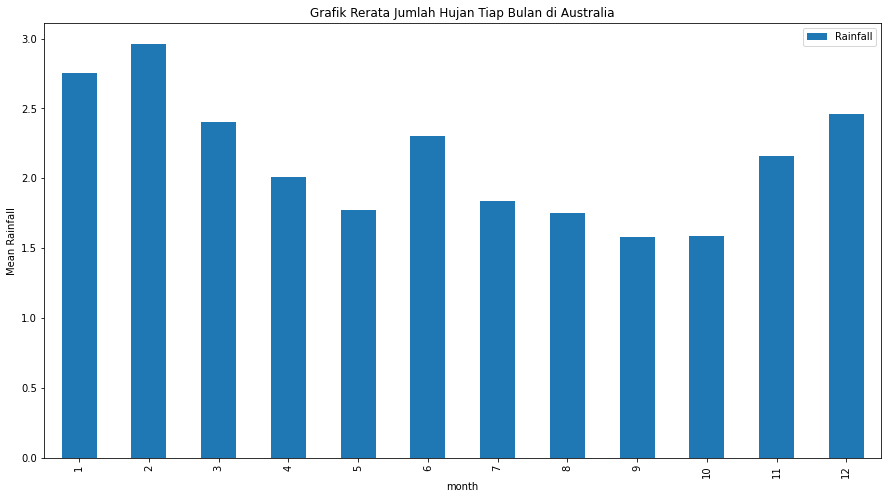

In [ ]:
df_new_.groupby("month")["Rainfall"].mean().plot(kind="bar", ylabel="Mean Rainfall", figsize=(15,8), legend=True, title="Grafik Rerata Jumlah Hujan Tiap Bulan di Australia")

rerata jumlah hujan yang tinggi ada di bulan january-april. Pada bulan Juli rerata jumlah hujannya juga tinggi padahal bulan Mei sudah mulai rendah. Hal itu disebabkan karena Juni merupakan awal musim panas yang biasanya terdapat banyak badai akibat pergantian musim

Chi-Square rainfall

In [ ]:
# Membuat contingency table
data_crosstab = pd.crosstab(df_new_['RainTomorrow'],
                            df_new_['Rainfall'],
                           margins=True, margins_name="Total")

# Mendefinisikan significance level
alpha = 0.05

# Perhitungan Chisquare
chi_square = 0
rows = df_new_['RainTomorrow'].unique()
columns = df_new_['Rainfall'].unique()
for i in columns:
    for j in rows:
        O = data_crosstab[i][j]
        E = data_crosstab[i]['Total'] * data_crosstab['Total'][j] / data_crosstab['Total']['Total']
        chi_square += (O-E)**2/E

# Pendekatan dengan p-value
print("Approach 1: The p-value approach to hypothesis testing in the decision rule")
p_value = 1 - stats.chi2.cdf(chi_square, (len(rows)-1)*(len(columns)-1))
conclusion = "Failed to reject the null hypothesis."
if p_value <= alpha:
    conclusion = "Null Hypothesis is rejected."
        
print("chisquare-score is:", chi_square, " and p value is:", p_value)
print(conclusion)
    
# Pendekatan dengan critical value
print("\n--------------------------------------------------------------------------------------")
print("Approach 2: The critical value approach to hypothesis testing in the decision rule")
critical_value = stats.chi2.ppf(1-alpha, (len(rows)-1)*(len(columns)-1))
conclusion = "Failed to reject the null hypothesis."
if chi_square > critical_value:
    conclusion = "Null Hypothesis is rejected."
        
print("chisquare-score is:", chi_square, " and critical value is:", critical_value)
print(conclusion)

Approach 1: The p-value approach to hypothesis testing in the decision rule
chisquare-score is: 7351.694586665846  and p value is: 0.0
Null Hypothesis is rejected.

--------------------------------------------------------------------------------------
Approach 2: The critical value approach to hypothesis testing in the decision rule
chisquare-score is: 7351.694586665846  and critical value is: 457.153259123211
Null Hypothesis is rejected.


berdasarkan perhitangan chi-square test, diambil kesimpulan bahwa bisa jadi terdapat korelasi antara raintomorrow dengan Rainfall. 

conclusion : Rainfall dimasukkan sebagai fitur ke model ML

### 4.3.8. Melihat korelasi raintomorrow dan RainToday

grafik korelasi

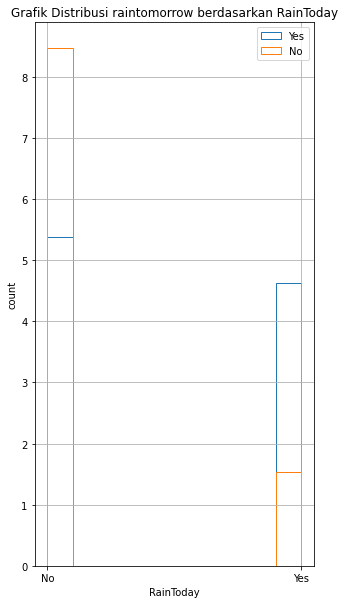

In [ ]:
fig, axes = plt.subplots(ncols=1,figsize=(5,10))
axes.hist(df_new_[df_new_['RainTomorrow'] == 'Yes'].RainToday,
         histtype='step', label='Yes', density=True)
axes.hist(df_new_[df_new_['RainTomorrow'] == 'No'].RainToday,
         histtype='step', label='No', density=True)
axes.set_title('Grafik Distribusi raintomorrow berdasarkan RainToday')
axes.legend()
axes.set_ylabel('count')
axes.set_xlabel('RainToday')
#axes.set_xticks(np.arange(0, 13, 1))
axes.grid()

Berdasarkan grafik:
- apabila RainToday = Yes, maka probabilitas besok akan hujan lebih tinggi.

Chi-Square RainToday

In [ ]:
# Membuat contingency table
data_crosstab = pd.crosstab(df_new_['RainTomorrow'],
                            df_new_['RainToday'],
                           margins=True, margins_name="Total")

# Mendefinisikan significance level
alpha = 0.05

# Perhitungan Chisquare
chi_square = 0
rows = df_new_['RainTomorrow'].unique()
columns = df_new_['RainToday'].unique()
for i in columns:
    for j in rows:
        O = data_crosstab[i][j]
        E = data_crosstab[i]['Total'] * data_crosstab['Total'][j] / data_crosstab['Total']['Total']
        chi_square += (O-E)**2/E

# Pendekatan dengan p-value
print("Approach 1: The p-value approach to hypothesis testing in the decision rule")
p_value = 1 - stats.chi2.cdf(chi_square, (len(rows)-1)*(len(columns)-1))
conclusion = "Failed to reject the null hypothesis."
if p_value <= alpha:
    conclusion = "Null Hypothesis is rejected."
        
print("chisquare-score is:", chi_square, " and p value is:", p_value)
print(conclusion)
    
# Pendekatan dengan critical value
print("\n--------------------------------------------------------------------------------------")
print("Approach 2: The critical value approach to hypothesis testing in the decision rule")
critical_value = stats.chi2.ppf(1-alpha, (len(rows)-1)*(len(columns)-1))
conclusion = "Failed to reject the null hypothesis."
if chi_square > critical_value:
    conclusion = "Null Hypothesis is rejected."
        
print("chisquare-score is:", chi_square, " and critical value is:", critical_value)
print(conclusion)

Approach 1: The p-value approach to hypothesis testing in the decision rule
chisquare-score is: 5390.463545046849  and p value is: 0.0
Null Hypothesis is rejected.

--------------------------------------------------------------------------------------
Approach 2: The critical value approach to hypothesis testing in the decision rule
chisquare-score is: 5390.463545046849  and critical value is: 3.841458820694124
Null Hypothesis is rejected.


\\berdasarkan perhitangan chi-square test, diambil kesimpulan bahwa bisa jadi terdapat korelasi antara raintomorrow dengan RainToday. 

conclusion : RainToday dimasukkan sebagai fitur ke model ML

### **fitur yang masuk dalam pemodelan :**

'MinTemp', 'WindGustSpeed', 'Humidity3pm', 'Cloud9am', 'month', 'Rainfall', dan 'raintoday'

## 4.2. Melihat statistik kolom numerik

In [ ]:
df_new.describe().T

,count,mean,std,min,25%,50%,75%,max
MinTemp,143975.0,12.194034,6.398495,-8.5,7.6,12.0,16.9,33.9
MaxTemp,144199.0,23.221348,7.119049,-4.8,17.9,22.6,28.2,48.1
Rainfall,142199.0,2.360918,8.478060,0.0,0.0,0.0,0.8,371.0
Evaporation,82670.0,5.468232,4.193704,0.0,2.6,4.8,7.4,145.0
Sunshine,75625.0,7.611178,3.785483,0.0,4.8,8.4,10.6,14.5
WindGustSpeed,135197.0,40.035230,13.607062,6.0,31.0,39.0,48.0,135.0
WindSpeed9am,143693.0,14.043426,8.915375,0.0,7.0,13.0,19.0,130.0
WindSpeed3pm,142398.0,18.662657,8.809800,0.0,13.0,19.0,24.0,87.0
Humidity9am,142806.0,68.880831,19.029164,0.0,57.0,70.0,83.0,100.0
Humidity3pm,140953.0,51.539116,20.795902,0.0,37.0,52.0,66.0,100.0


In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 27 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           145460 non-null  datetime64[ns]
 1   Location       145460 non-null  object        
 2   MinTemp        143975 non-null  float64       
 3   MaxTemp        144199 non-null  float64       
 4   Rainfall       142199 non-null  float64       
 5   Evaporation    82670 non-null   float64       
 6   Sunshine       75625 non-null   float64       
 7   WindGustDir    135134 non-null  object        
 8   WindGustSpeed  135197 non-null  float64       
 9   WindDir9am     134894 non-null  object        
 10  WindDir3pm     141232 non-null  object        
 11  WindSpeed9am   143693 non-null  float64       
 12  WindSpeed3pm   142398 non-null  float64       
 13  Humidity9am    142806 non-null  float64       
 14  Humidity3pm    140953 non-null  float64       
 15  

# V. Data Preprocessing

## 5.1. Drop kolom yang tidak dipakai untuk pemodelan

In [ ]:
# menampilkan judul kolom dataset
df_new.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow', 'day', 'month', 'raintomorrow',
       'raintoday'],
      dtype='object')

In [ ]:
df_new.shape

(145460, 27)

In [ ]:
# menghapus kolom yang tidak digunakan untuk pemodelan
df_new.drop(columns=['Date', 'Location', 'MaxTemp', 'Evaporation', 
       'Sunshine', 'WindGustDir', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Pressure9am', 'Pressure3pm', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow', 'day'], inplace=True)
df_new.head()

,MinTemp,Rainfall,WindGustSpeed,Humidity3pm,Cloud9am,month,raintomorrow,raintoday
0,13.4,0.6,44.0,22.0,8.0,12,0.0,0.0
1,7.4,0.0,44.0,25.0,NaN,12,0.0,0.0
2,12.9,0.0,46.0,30.0,NaN,12,0.0,0.0
3,9.2,0.0,24.0,16.0,NaN,12,0.0,0.0
4,17.5,1.0,41.0,33.0,7.0,12,0.0,0.0


## 5.2. Get data for model inference

In [ ]:
# Get data for model inference.
# Data inference tidak boleh ada di train dan test. jadi datanya tuh dibagi buat 3 peruntukan.

data_inf = df_new.sample(20, random_state=9)   # ambil 10 sampel, random state gunanya untuk biar ga berubah2, nilainya 9. Nilainya terserah gada pengaruhnya
data_inf

,MinTemp,Rainfall,WindGustSpeed,Humidity3pm,Cloud9am,month,raintomorrow,raintoday
125616,9.9,0.0,37.0,30.0,NaN,2,0.0,0.0
124348,NaN,NaN,NaN,60.0,NaN,6,NaN,NaN
130732,10.0,4.4,59.0,98.0,NaN,12,0.0,1.0
48526,14.9,0.0,46.0,37.0,8.0,2,0.0,0.0
50256,-1.7,0.0,20.0,50.0,NaN,5,0.0,0.0
8939,20.1,0.0,39.0,21.0,NaN,2,0.0,0.0
40248,15.0,0.0,61.0,22.0,0.0,12,0.0,0.0
124102,6.8,9.6,37.0,83.0,NaN,9,1.0,1.0
102517,10.5,0.0,33.0,61.0,8.0,5,0.0,0.0
27951,13.2,0.0,30.0,31.0,NaN,2,0.0,0.0


In [ ]:
# Remove inference-set

data_train_test = df_new.drop(data_inf.index)
data_train_test.head()

,MinTemp,Rainfall,WindGustSpeed,Humidity3pm,Cloud9am,month,raintomorrow,raintoday
0,13.4,0.6,44.0,22.0,8.0,12,0.0,0.0
1,7.4,0.0,44.0,25.0,NaN,12,0.0,0.0
2,12.9,0.0,46.0,30.0,NaN,12,0.0,0.0
3,9.2,0.0,24.0,16.0,NaN,12,0.0,0.0
4,17.5,1.0,41.0,33.0,7.0,12,0.0,0.0


In [ ]:
# Reset index
data_train_test.reset_index(drop=True, inplace=True)
data_inf.reset_index(drop=True, inplace=True)
data_train_test.head()

,MinTemp,Rainfall,WindGustSpeed,Humidity3pm,Cloud9am,month,raintomorrow,raintoday
0,13.4,0.6,44.0,22.0,8.0,12,0.0,0.0
1,7.4,0.0,44.0,25.0,NaN,12,0.0,0.0
2,12.9,0.0,46.0,30.0,NaN,12,0.0,0.0
3,9.2,0.0,24.0,16.0,NaN,12,0.0,0.0
4,17.5,1.0,41.0,33.0,7.0,12,0.0,0.0


## 5.2. Splitting Dataset

In [ ]:
# Split between 'X' (features) and 'y' (target)
X = data_train_test.drop('raintomorrow', axis = 1)
y = data_train_test['raintomorrow']
X.head()

,MinTemp,Rainfall,WindGustSpeed,Humidity3pm,Cloud9am,month,raintoday
0,13.4,0.6,44.0,22.0,8.0,12,0.0
1,7.4,0.0,44.0,25.0,NaN,12,0.0
2,12.9,0.0,46.0,30.0,NaN,12,0.0
3,9.2,0.0,24.0,16.0,NaN,12,0.0
4,17.5,1.0,41.0,33.0,7.0,12,0.0


In [ ]:
# Split between train-set and test-set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17) # sebanyak 20% data jadi data test, 80% train

print('Train Size : ', X_train.shape)
print('Test Size : ', X_test.shape)

Train Size :  (116352, 7)
Test Size :  (29088, 7)


## 5.3. Outlier Handling

Saya akan handling outlier untuk kolom numerikal

### 5.3.1. Outlier Detection

Checking normality of the data distribution

Text(0.5, 0, 'Rainfall')

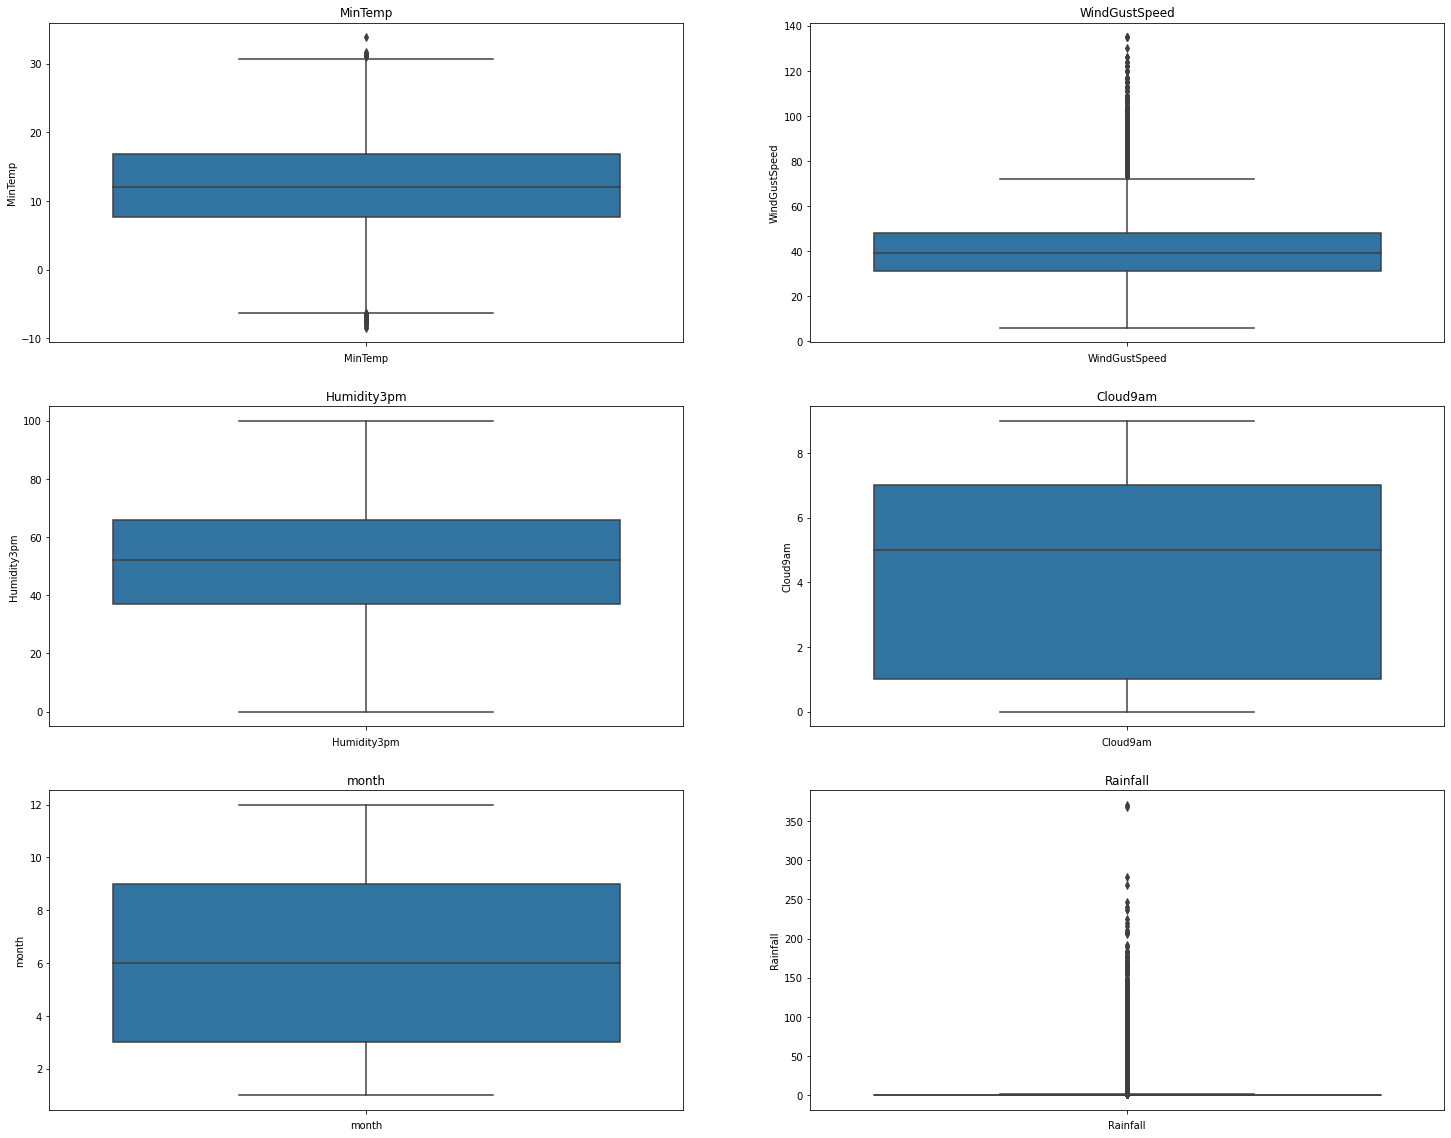

In [ ]:
plt.figure(figsize=(25,20))
plt.subplot(3,2,1)
sns.boxplot(y=X_train['MinTemp'])
plt.title('MinTemp')
plt.xlabel('MinTemp')

plt.subplot(3,2,2)
sns.boxplot(y=df_new['WindGustSpeed'])
plt.title('WindGustSpeed')
plt.xlabel('WindGustSpeed')

plt.subplot(3,2,3)
sns.boxplot(y=df_new['Humidity3pm'])
plt.title('Humidity3pm')
plt.xlabel('Humidity3pm')

plt.subplot(3,2,4)
sns.boxplot(y=df_new['Cloud9am'])
plt.title('Cloud9am')
plt.xlabel('Cloud9am')

plt.subplot(3,2,5)
sns.boxplot(y=df_new['month'])
plt.title('month')
plt.xlabel('month')

plt.subplot(3,2,6)
sns.boxplot(y=df_new['Rainfall'])
plt.title('Rainfall')
plt.xlabel('Rainfall')

In [ ]:
X_train.skew()

MinTemp          0.019789
Rainfall         9.464162
WindGustSpeed    0.873260
Humidity3pm      0.030998
Cloud9am        -0.236021
month            0.029730
raintoday        1.317476
dtype: float64

data yang skew adalah data dengan skewness <-0.5 dan >0.5 dan akan dideteksi outliernya dengan metode IQR. Data yang tidak skew dideteksi dengan metode std.

kolom `Rainfall` dan kolom `WindGustSpeed` memiliki skewness > 0.5 sehingga kolom ini right-skewed.

Outliers Detection - IQR

In [ ]:
# Function to find upper and lower boundaries for skewed distributed variables
# Let's calculate the boundaries outside which sit the outliers for skewed distributions
# Distance passed as an argument, gives us the option to estimate 1.5 times or 3 times the IQR to calculate the boundaries.

def find_skewed_boundaries(df, variable, distance):
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

Outlier detection - IQR : Rainfall

In [ ]:
upper_rainfall, lower_rainfall = find_skewed_boundaries(X_train, 'Rainfall',3)
upper_rainfall, lower_rainfall

(3.2, -2.4000000000000004)

In [ ]:
print('Total data: {}'.format(len(X_train)))
print('Data with Rainfall bigger than 3.2   : {}'.format(len([X_train['Rainfall'] > upper_rainfall])))
print('')
print('% data with Rainfall bigger than 3.2 : {}'.format(len([X_train['Rainfall'] > upper_rainfall])/len(X_train) * 100))

Total data: 116352
Data with Rainfall bigger than 3.2   : 1

% data with Rainfall bigger than 3.2 : 0.0008594609460946094


Outlier detection - IQR : WindGustSpeed

In [ ]:
upper_wgs, lower_wgs = find_skewed_boundaries(X_train, 'WindGustSpeed', 1.5)
upper_wgs, lower_wgs

(73.5, 5.5)

In [ ]:
print('Total data: {}'.format(len(X_train)))
print('Data with WindGustSpeed bigger than 73.5   : {}'.format(len([X_train['WindGustSpeed'] > upper_wgs])))
print('Data with WindGustSpeed lower than 5.5   : {}'.format(len([X_train['WindGustSpeed'] < lower_wgs])))
print('% data with WindGustSpeed outliers : {}'.format(len([X_train['WindGustSpeed'] > upper_wgs] + [X_train['WindGustSpeed'] < lower_wgs])/len(X_train) * 100))

Total data: 116352
Data with WindGustSpeed bigger than 73.5   : 1
Data with WindGustSpeed lower than 5.5   : 1
% data with WindGustSpeed outliers : 0.0017189218921892188


Ternyata untuk kolom `Rainfall` dan `WindGustSpeed` hanya ada kurang dari 1% outlier dari keseluruhan data train. Namun memang data cuaca bisa memiliki nilai yang sangat tinggi dan sangat rendah. Maka tidak akan saya anggap data tersebut outlier. begitu pula untuk kolom lainnya.

## 5.4. Handling Missing Value

### 5.4.1. Check Missing Values

In [ ]:
X_train.isna().sum()

MinTemp           1188
Rainfall          2646
WindGustSpeed     8214
Humidity3pm       3581
Cloud9am         44710
month                0
raintoday         2646
dtype: int64

In [ ]:
X_test.isna().sum()

MinTemp            295
Rainfall           614
WindGustSpeed     2047
Humidity3pm        926
Cloud9am         11168
month                0
raintoday          614
dtype: int64

In [ ]:
y_train.isna().sum()

2650

In [ ]:
y_test.isna().sum()

616

terdapat banyak sekali missing values di dataset ini. wajar saja karena ini dataset selama 10 tahun.

### 5.4.2. Handling Missing Values

In [ ]:
X_train['Rainfall'].unique()

array([0.000e+00, 3.200e+00, 4.000e-01,       nan, 1.200e+00, 1.500e+00,
       3.800e+00, 1.000e-01, 7.200e+00, 1.080e+01, 1.600e+00, 2.760e+01,
       1.000e+00, 2.000e-01, 1.540e+01, 4.200e+00, 8.600e+00, 2.000e+00,
       8.000e-01, 6.000e-01, 7.140e+01, 3.600e+00, 1.040e+01, 2.400e+00,
       4.000e+00, 2.300e+01, 2.200e+00, 1.160e+01, 2.800e+00, 8.200e+00,
       2.240e+01, 6.200e+00, 1.780e+01, 1.420e+01, 3.000e+00, 2.280e+01,
       3.780e+01, 1.740e+01, 2.040e+01, 3.240e+01, 1.760e+01, 1.200e+01,
       1.800e+00, 7.400e+00, 3.400e+01, 4.800e+00, 1.140e+01, 6.000e+00,
       5.600e+00, 7.000e+00, 3.400e+00, 2.140e+01, 1.500e+01, 1.240e+01,
       7.800e+00, 7.600e+00, 6.800e+00, 5.200e+00, 1.640e+01, 6.900e+00,
       1.400e+00, 1.000e+01, 2.780e+01, 1.380e+01, 1.980e+01, 2.560e+01,
       3.120e+01, 1.600e+01, 6.400e+00, 8.400e+00, 3.980e+01, 1.460e+01,
       2.600e+00, 1.250e+01, 1.840e+01, 2.340e+01, 1.800e+01, 1.700e+00,
       1.220e+01, 4.400e+00, 9.200e+00, 5.000e+00, 

values nan dari Rainfall saya asumsikan dimana hari itu tidak ada hujan sehingga akan diisi nol. Hal ini karena bila dilihat dari unique valuenya tidak ada yang benar-benar 0 dan hal itu tidak mungkin karena ada hari yang tidak hujan dan pastinya jumlah hujannya 0.

In [ ]:
X_train.skew()

MinTemp          0.019789
Rainfall         9.464162
WindGustSpeed    0.873260
Humidity3pm      0.030998
Cloud9am        -0.236021
month            0.029730
raintoday        1.317476
dtype: float64

missing values dari WindGustSpeed akan diisi mediannya karena skewed, kolom lainnya akan diisi nilai mean karena distribusinya normal.



In [ ]:
mean_imputer = SimpleImputer(strategy="mean")
median_imputer = SimpleImputer(strategy="median")
cat_imputer = SimpleImputer(strategy="most_frequent")

## 5.5. Feature Engineering

### 5.5.1. Pipeline Missing Values

segmen ini terdiri dari handling missing values dan handling imbalance data

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
# Membuat Pipeline untuk handling missing values X_train dan X_test
misval_pipeline = ColumnTransformer([
    ('normal', Pipeline([
        ('mean_imputer', SimpleImputer(strategy='mean')),
    ]), ['MinTemp', 'Humidity3pm', 'Cloud9am']),

    ('skewed', Pipeline([
        ('median_imputer', SimpleImputer(strategy='median')),
    ]), ['Rainfall', 'WindGustSpeed']),

    ('raintoday', Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
    ]), ['raintoday','month']),
])                                        

In [ ]:
X_train_clean = misval_pipeline.fit_transform(X_train)
X_test_clean = misval_pipeline.fit_transform(X_test)

In [ ]:
X_train.head()

,MinTemp,Rainfall,WindGustSpeed,Humidity3pm,Cloud9am,month,raintoday
79403,14.9,0.0,43.0,55.0,7.0,1,0.0
145349,25.3,0.0,50.0,28.0,NaN,3,0.0
116984,15.2,3.2,59.0,59.0,8.0,10,1.0
121331,2.7,0.0,26.0,37.0,1.0,6,0.0
70890,3.7,0.0,39.0,33.0,7.0,5,0.0


In [ ]:
X_train_clean_im = pd.DataFrame(X_train_clean)
X_train_clean_im.head()

,0,1,2,3,4,5,6
0,14.9,55.0,7.000000,0.0,43.0,0.0,1.0
1,25.3,28.0,4.458851,0.0,50.0,0.0,3.0
2,15.2,59.0,8.000000,3.2,59.0,1.0,10.0
3,2.7,37.0,1.000000,0.0,26.0,0.0,6.0
4,3.7,33.0,7.000000,0.0,39.0,0.0,5.0


In [ ]:
X_train_clean_im.rename(columns={0 : 'MinTemp', 1:'Humidity3pm', 2:'Cloud9am', 3: 'Rainfall', 4:'WindGustSpeed', 5:'raintoday', 6:'month'}, inplace = True)

In [ ]:
X_train_clean_im.head()

,MinTemp,Humidity3pm,Cloud9am,Rainfall,WindGustSpeed,raintoday,month
0,14.9,55.0,7.000000,0.0,43.0,0.0,1.0
1,25.3,28.0,4.458851,0.0,50.0,0.0,3.0
2,15.2,59.0,8.000000,3.2,59.0,1.0,10.0
3,2.7,37.0,1.000000,0.0,26.0,0.0,6.0
4,3.7,33.0,7.000000,0.0,39.0,0.0,5.0


In [ ]:
X_test_clean = pd.DataFrame(X_test_clean)
X_test_clean.rename(columns={0 : 'MinTemp', 1:'Humidity3pm', 2:'Cloud9am', 3: 'Rainfall', 4:'WindGustSpeed', 5:'raintoday', 6:'month'}, inplace = True)

In [ ]:
# handling missing values untuk y_train dan y_test
imputer = SimpleImputer(strategy='most_frequent')
y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)
y_train_clean = imputer.fit_transform(y_train)
y_test_clean = imputer.fit_transform(y_test)

In [ ]:
# handling imbalance data pada train set
smotenc = SMOTENC(categorical_features=[5,6], random_state = 42)
X_train_balanced, y_train_balanced = smotenc.fit_resample(X_train_clean, y_train_clean)

In [ ]:
pd.DataFrame(y_train_balanced).value_counts()

0.0    90861
1.0    90861
dtype: int64

setelah dihandling, sudah sama jumlahnya antara kelas besok hujan dan kelas besok tidak hujan

In [ ]:
X_train.columns

Index(['MinTemp', 'Rainfall', 'WindGustSpeed', 'Humidity3pm', 'Cloud9am',
       'month', 'raintoday'],
      dtype='object')

In [ ]:
X_train_balanced = pd.DataFrame(X_train_balanced)
X_train_balanced.head()

,0,1,2,3,4,5,6
0,14.9,55.0,7.000000,0.0,43.0,0.0,1.0
1,25.3,28.0,4.458851,0.0,50.0,0.0,3.0
2,15.2,59.0,8.000000,3.2,59.0,1.0,10.0
3,2.7,37.0,1.000000,0.0,26.0,0.0,6.0
4,3.7,33.0,7.000000,0.0,39.0,0.0,5.0


In [ ]:
# mengganti nama kolom
X_train_balanced.rename(columns={0 : 'MinTemp', 1:'Humidity3pm', 2:'Cloud9am', 3: 'Rainfall', 4:'WindGustSpeed', 5:'raintoday', 6:'month'}, inplace = True)

In [ ]:
X_train_balanced.head()

,MinTemp,Humidity3pm,Cloud9am,Rainfall,WindGustSpeed,raintoday,month
0,14.9,55.0,7.000000,0.0,43.0,0.0,1.0
1,25.3,28.0,4.458851,0.0,50.0,0.0,3.0
2,15.2,59.0,8.000000,3.2,59.0,1.0,10.0
3,2.7,37.0,1.000000,0.0,26.0,0.0,6.0
4,3.7,33.0,7.000000,0.0,39.0,0.0,5.0


In [ ]:
# mengecek jumlah data
y_train_balanced = pd.DataFrame(y_train_balanced)
y_train_balanced.value_counts()

0.0    90861
1.0    90861
dtype: int64

data sudah balance

### 5.5. Pipeline Scaling dan Encoding

In [ ]:
# membuat pipeline scaling dan encoding
encoder = OneHotEncoder(handle_unknown='ignore')
num_pipeline = ColumnTransformer([
    ('normal', Pipeline([
        ('scaler', StandardScaler())
    ]), ['MinTemp', 'Humidity3pm', 'Cloud9am']),

    ('skewed', Pipeline([
        ('scaler', MinMaxScaler())
    ]), ['Rainfall', 'WindGustSpeed'])
])

cat_pipeline = ColumnTransformer([
    ('cat', Pipeline([
        ('ohe', OneHotEncoder(handle_unknown='ignore'))
    ]), ['month', 'raintoday']),
])

prep_pipeline = Pipeline([
    ('num', num_pipeline),
    ('cat', cat_pipeline)                          
])

prepp_pipeline = ColumnTransformer([
    ('normal', Pipeline([
        ('scaler', StandardScaler())
    ]), ['MinTemp', 'Humidity3pm', 'Cloud9am']),

    ('skewed', Pipeline([
        ('scaler', MinMaxScaler())
    ]), ['Rainfall', 'WindGustSpeed']),

    ('cat', Pipeline([
        ('ohe', OneHotEncoder(handle_unknown='ignore'))
    ]), ['month', 'raintoday']),                      
])

In [ ]:
# Scaling numerik columns dengan pipeline
X_train_balanced_num = num_pipeline.fit_transform(X_train_balanced)
X_train_im_num = num_pipeline.fit_transform(X_train_clean_im)
X_test_num = num_pipeline.fit_transform(X_test_clean)

In [ ]:
pd.DataFrame(X_train_balanced_num)

,0,1,2,3,4
0,0.370426,-0.121654,0.997017,0.000000,0.286822
1,2.024681,-1.380412,-0.186309,0.000000,0.341085
2,0.418145,0.064829,1.462682,0.008625,0.410853
3,-1.570143,-0.960826,-1.796976,0.000000,0.155039
4,-1.411080,-1.147309,0.997017,0.000000,0.255814
...,...,...,...,...,...
181717,-0.623495,-0.011093,-1.796976,0.002195,0.255814
181718,0.909452,-0.307088,1.425595,0.000000,0.426357
181719,-0.467215,-0.431879,0.674518,0.016450,0.410853
181720,-0.558259,-0.264505,1.462682,0.000035,0.193798


In [ ]:
# Encoding categorical columns dengan pipeline
X_train_balanced_cat = cat_pipeline.fit_transform(X_train_balanced).toarray()
X_train_im_cat = cat_pipeline.fit_transform(X_train_clean_im).toarray()
X_test_cat = cat_pipeline.fit_transform(X_test_clean).toarray()

In [ ]:
X_train_balanced_cat = pd.DataFrame(X_train_balanced_cat)
X_train_balanced_cat.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
X_train_im_cat = pd.DataFrame(X_train_im_cat)
X_train_im_cat.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
X_test_cat = pd.DataFrame(X_test_cat)
X_test_cat.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
#X_train_imbalanced_num = pd.DataFrame(data=X_train_imbalanced_num)
X_train_balanced_num

array([[ 3.70426050e-01, -1.21653912e-01,  9.97016871e-01,
         0.00000000e+00,  2.86821705e-01],
       [ 2.02468134e+00, -1.38041216e+00, -1.86308674e-01,
         0.00000000e+00,  3.41085271e-01],
       [ 4.18144952e-01,  6.48287910e-02,  1.46268241e+00,
         8.62533693e-03,  4.10852713e-01],
       ...,
       [-4.67215296e-01, -4.31878518e-01,  6.74518377e-01,
         1.64502876e-02,  4.10852713e-01],
       [-5.58258513e-01, -2.64505081e-01,  1.46268241e+00,
         3.45640006e-05,  1.93798450e-01],
       [-3.36216143e-02,  1.26485308e+00, -1.86308674e-01,
         0.00000000e+00,  3.64645778e-01]])

In [ ]:
# menggabungkan kolom numerik dan categorical hasil scaling dan encoding pada X_train balance
X_train_final = np.concatenate([X_train_balanced_num, X_train_balanced_cat], axis=1)
X_train_final_df = pd.DataFrame(X_train_final)

In [ ]:
X_train_final_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.370426,-0.121654,0.997017,0.000000,0.286822,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2.024681,-1.380412,-0.186309,0.000000,0.341085,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.418145,0.064829,1.462682,0.008625,0.410853,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,-1.570143,-0.960826,-1.796976,0.000000,0.155039,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,-1.411080,-1.147309,0.997017,0.000000,0.255814,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
# menggabungkan kolom numerik dan categorical hasil scaling dan encoding pada X_train imbalance
X_train_final_im = np.concatenate([X_train_im_num, X_train_im_cat], axis=1)
X_train_final_im_df = pd.DataFrame(X_train_final_im)

In [ ]:
# menggabungkan kolom numerik dan categorical hasil scaling dan encoding pada X_test
X_test_final = np.concatenate([X_test_num, X_test_cat], axis=1)
X_test_final_df = pd.DataFrame(X_test_final)

In [ ]:
X_train_final_prep = prep_pipeline.fit_transform(X_train)

In [ ]:
X_train_balanced_df = pd.DataFrame(X_train_balanced)
X_train_clean_im = pd.DataFrame(X_train_clean_im)
X_test_clean = pd.DataFrame(X_test_clean)

In [ ]:
X_train_final_prep = prepp_pipeline.fit_transform(X_train_balanced)
X_train_final_prep_im = prepp_pipeline.fit_transform(X_train_clean_im)
X_test_final_prep = prepp_pipeline.fit_transform(X_test_clean)

# VI. Model Definition

## 6.1. Cross Validation Base Model

In [ ]:
X_train_final_df.isna().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
dtype: int64

In [ ]:
y_train_balanced.isna().sum()

0    0
dtype: int64

In [ ]:
log_model = LogisticRegression()
svc_model = SVC()  # SVM untuk data kategorikal adalah SVC
dt_model = DecisionTreeClassifier()
rf_model = RandomForestClassifier()
knn_model = KNeighborsClassifier()

In [ ]:
# Cross-validation untuk base model

# Menyiapkan model dalam list
models = []
models.append(('log', log_model))
models.append(('svc', svc_model))
models.append(('rf', rf_model))
models.append(('knn', knn_model))

# Menyiapkan list kosong untuk wadah hasil cross validation
names = []
results = []
mean_score = []
stdev_score = []

# Melakukan Cross Validation setiap model
for name, model in models:
    model.fit(X_train_final_df,y_train_balanced)
    scores = cross_val_score(model, X_train_final_df, y_train_balanced, scoring='accuracy', cv=3, n_jobs=-1)

    names.append(name)
    results.append(scores)
    mean_score.append(round(np.mean(scores),4))
    stdev_score.append(round(np.std(scores),4))

cv_result = pd.DataFrame({'models':names, 'mean_accu':mean_score, 'stdev_accu':stdev_score})

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, 

In [ ]:
cv_result.sort_values(by='mean_accu', ascending=False)

,models,mean_accu,stdev_accu
2,rf,0.8746,0.0638
3,knn,0.7958,0.0041
1,svc,0.7641,0.0025
0,log,0.7554,0.0012


model yang memiliki rerata akurasi tertinggi adalah model Random Forest dengan rerata akurasi 87%. Selanjutnya saya akan menggunakan algoritma ini untuk pemodelan machine learning dengan terlebih dahulu mencari best hyperparameternya.

## 6.2. Hyperparameter Tuning Random Forest

Saya akan mencari model terbaik dari RF dengan hyperparameter tuning menggunakan GridSearchCV. Saya akan aplikasikan model tersebut pada data train balance dan imbalance

Model on Balance Data

In [ ]:
rf_model = RandomForestClassifier()
parameters_rf = {'n_estimators':[25,50,75,100,125,150],
              'criterion': ['gini', 'entropy'],
              'max_depth':[3,5,7,9],
              'random_state':[1,9]
              }

grid_rf = GridSearchCV(estimator=rf_model, param_grid=parameters_rf, scoring='accuracy',cv=3, verbose=1, n_jobs=-1)
grid_rf.fit(X_train_final_df,y_train_balanced)
grid_rf.best_params_

Fitting 3 folds for each of 96 candidates, totalling 288 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


{'criterion': 'gini', 'max_depth': 9, 'n_estimators': 75, 'random_state': 1}

Hyperparameter terbaik untuk model Random Forest pada data balance:
- 'criterion': 'gini'
- 'max_depth': 9
-'n_estimators': 75
- 'random_state': 1

Model on Imbalance Data

In [ ]:
rf_model = RandomForestClassifier()
parameters_rf = {'n_estimators':[25,50,75,100,125,150],
              'criterion': ['gini', 'entropy'],
              'max_depth':[3,5,7,9],
              'random_state':[1,9]
              }

grid_rf = GridSearchCV(estimator=rf_model, param_grid=parameters_rf, scoring='accuracy',cv=3, verbose=1, n_jobs=-1)
grid_rf.fit(X_train_final_im_df,y_train_clean)
grid_rf.best_params_

Fitting 3 folds for each of 96 candidates, totalling 288 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


{'criterion': 'gini', 'max_depth': 9, 'n_estimators': 75, 'random_state': 9}

Hyperparameter terbaik untuk model Random Forest pada data imbalance :
- 'criterion': 'gini'
- 'max_depth': 9
-'n_estimators': 75
- 'random_state': 9

# VII. Model Training 

Saya akan coba training model ke data train yang balanced dan imblanaced, kemudian mengambil hasil classification report terbaiknya.

In [ ]:
best_rf_model = RandomForestClassifier(criterion= 'gini', max_depth= 9, n_estimators= 75, random_state= 1)
best_rf_model.fit(X_train_final_df,y_train_balanced)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(max_depth=9, n_estimators=75, random_state=1)

In [ ]:
best_rf_model_im = RandomForestClassifier(criterion= 'gini', max_depth= 9, n_estimators=75, random_state= 9)
best_rf_model_im.fit(X_train_final_im_df,y_train_clean)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(max_depth=9, n_estimators=75, random_state=9)

# VIII. Model Evaluation

## 8.1. Evaluation on balance train set

In [ ]:
print('Classification Report RF Model\n',classification_report(y_train_balanced, best_rf_model.predict(X_train_final)))

Classification Report RF Model
               precision    recall  f1-score   support

         0.0       0.79      0.81      0.80     89604
         1.0       0.80      0.79      0.80     89604

    accuracy                           0.80    179208
   macro avg       0.80      0.80      0.80    179208
weighted avg       0.80      0.80      0.80    179208



**Model RF on train set balance**
- dari seluruh data yang terprediksi 0/besok tidak hujan, ada 0.79 data yang benar-benar not default.
- dari seluruh data aktual 0/besok tidak hujan, terdapat 0.84 data yang terprediksi not default.
- terdapat 81% data terprediksi 0/besok tidak hujan yang benar.


- dari seluruh data yang terprediksi 1/besok hujan, ada 0.83 data yang benar-benar default.
- dari seluruh data aktual 1/besok hujan, terdapat 0.74 data yang terprediksi default
- terdapat 80% data terprediksi besok hujan/1 yang benar.

- Akurasi model : 81%
- Nilai F1-score tidak berbeda jauh antara kategori not besok tidak hujan (0) dan besok hujan (1). Hal ini adalah efek dari handling imbalance data menggunakan smote sehingga model bisa belajar secara seimbang untuk kedua kelas.

In [ ]:
print('Classification Report RF Model\n',classification_report(y_test_clean, best_rf_model.predict(X_test_final)))

Classification Report RF Model
               precision    recall  f1-score   support

         0.0       0.93      0.40      0.56     22422
         1.0       0.29      0.89      0.44      6270

    accuracy                           0.51     28692
   macro avg       0.61      0.65      0.50     28692
weighted avg       0.79      0.51      0.53     28692



**Model RF on test set where train set is balance**
- dari seluruh data yang terprediksi 0/besok tidak hujan, ada 0.93 data yang benar-benar not default.
- dari seluruh data aktual 0/besok tidak hujan, terdapat 0.37 data yang terprediksi not default.
- terdapat 53% data terprediksi 0/besok tidak hujan yang benar.


- dari seluruh data yang terprediksi 1/besok hujan, ada 0.29 data yang benar-benar default.
- dari seluruh data aktual 1/besok hujan, terdapat 0.90 data yang terprediksi default
- terdapat 44% data terprediksi besok hujan/1 yang benar.

- Akurasi model : 9%
- Nilai F1-score tidak berbeda jauh antara kategori not besok tidak hujan (0) dan besok hujan (1). Hal ini adalah efek dari handling imbalance data menggunakan smote sehingga model bisa belajar secara seimbang untuk kedua kelas.

## 8.2. Evaluation on imbalance train set

In [ ]:
print('Classification Report RF Model\n',classification_report(y_train_clean, best_rf_model_im.predict(X_train_final_im_df)))

Classification Report RF Model
               precision    recall  f1-score   support

         0.0       0.86      0.96      0.91     89604
         1.0       0.77      0.42      0.54     25164

    accuracy                           0.85    114768
   macro avg       0.81      0.69      0.73    114768
weighted avg       0.84      0.85      0.83    114768



**Model RF on train set imbalance**
- dari seluruh data yang terprediksi 0/besok tidak hujan, ada 0.85 data yang benar-benar not default.
- dari seluruh data aktual 0/besok tidak hujan, terdapat 0.97 data yang terprediksi not default.
- terdapat 91% data terprediksi 0/besok tidak hujan yang benar.


- dari seluruh data yang terprediksi 1/besok hujan, ada 0.78 data yang benar-benar default.
- dari seluruh data aktual 1/besok hujan, terdapat 0.41 data yang terprediksi default
- terdapat 54% data terprediksi besok hujan/1 yang benar.

- Akurasi model : 84%
- Nilai F1-score berbeda jauh antara kategori not besok tidak hujan (0) dan besok hujan (1). Hal ini adalah data imbalance dimana kelas 0 lebih banyak dari kelas 1.

In [ ]:
print('Classification Report RF Model\n',classification_report(y_test_clean, best_rf_model_im.predict(X_test_final)))

Classification Report RF Model
               precision    recall  f1-score   support

         0.0       0.85      0.96      0.90     22422
         1.0       0.74      0.41      0.53      6270

    accuracy                           0.84     28692
   macro avg       0.80      0.69      0.72     28692
weighted avg       0.83      0.84      0.82     28692



**Model RF on test set where train set is imbalance**
- dari seluruh data yang terprediksi 0/besok tidak hujan, ada 0.78 data yang benar-benar not default.
- dari seluruh data aktual 0/besok tidak hujan, terdapat 100% data yang terprediksi not default.
- terdapat 88% data terprediksi 0/besok tidak hujan yang benar.


- dari seluruh data yang terprediksi 1/besok hujan, ada 100% data yang benar-benar default.
- dari seluruh data aktual 1/besok hujan, terdapat 0.0 data yang terprediksi default
- terdapat 0% data terprediksi besok hujan/1 yang benar.

- Akurasi model : 78%
- Nilai F1-score berbeda jauh antara kategori not besok tidak hujan (0) dan besok hujan (1). Hal ini adalah data imbalance dimana kelas 0 lebih banyak dari kelas 1.

**Overall** :
- hasil evaluasi antara train set dan test set dengan data train balance menunjukkan adanya overfit. Hal ini sebagai efek dari handling imbalance data
- hasil evaluasi dengan data train imbalance menunjukkan skor yang lebih baik dengan model yang good fit.

In [ ]:
# membuat pipeline model yang terbaik

model_pipeline = Pipeline([
    ('rf', RandomForestClassifier(criterion= 'gini', max_depth= 9, n_estimators= 150, random_state= 1))                           
])

final_pipeline = Pipeline([
    ('prep', prepp_pipeline),
    ('mod', model_pipeline)                          
])

In [ ]:
final_pipeline.fit(X_train_clean_im, y_train_clean)

/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py:394: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('normal',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['MinTemp', 'Humidity3pm',
                                                   'Cloud9am']),
                                                 ('skewed',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['Rainfall',
                                                   'WindGustSpeed']),
                                                 ('cat',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
           

# IX. Inference

## 9.1. Model Saving

model yang telah disimpan akan diterapkan pada data inference

In [ ]:
# Model Saving

with open('rain_predictor.pkl', 'wb') as file_1:  # nama file, wb write binary, as aliasnya
  pickle.dump(final_pipeline, file_1)  # masukin yang fit dan aliasnya

In [ ]:
# Load All Models

with open('rain_predictor.pkl', 'rb') as file_1:
  final_pipeline = pickle.load(file_1)

## 9.2. Preprocessing inference data

In [ ]:
data_inf

,MinTemp,Rainfall,WindGustSpeed,Humidity3pm,Cloud9am,month,raintomorrow,raintoday
0,9.9,0.0,37.0,30.0,NaN,2,0.0,0.0
1,NaN,NaN,NaN,60.0,NaN,6,NaN,NaN
2,10.0,4.4,59.0,98.0,NaN,12,0.0,1.0
3,14.9,0.0,46.0,37.0,8.0,2,0.0,0.0
4,-1.7,0.0,20.0,50.0,NaN,5,0.0,0.0
5,20.1,0.0,39.0,21.0,NaN,2,0.0,0.0
6,15.0,0.0,61.0,22.0,0.0,12,0.0,0.0
7,6.8,9.6,37.0,83.0,NaN,9,1.0,1.0
8,10.5,0.0,33.0,61.0,8.0,5,0.0,0.0
9,13.2,0.0,30.0,31.0,NaN,2,0.0,0.0


In [ ]:
data_inf.isna().sum()

MinTemp           20
Rainfall          57
WindGustSpeed    149
Humidity3pm       64
Cloud9am         763
month              0
raintomorrow      51
raintoday         57
dtype: int64

In [ ]:
data_inf_clean = misval_pipeline.fit_transform(data_inf)
data_inf_clean = pd.DataFrame(data_inf_clean)
data_inf_clean.head()

,0,1,2,3,4,5,6
0,9.900000,30.0,4.434923,0.0,37.0,0.0,2.0
1,12.342677,60.0,4.434923,0.0,39.0,0.0,6.0
2,10.000000,98.0,4.434923,4.4,59.0,1.0,12.0
3,14.900000,37.0,8.000000,0.0,46.0,0.0,2.0
4,-1.700000,50.0,4.434923,0.0,20.0,0.0,5.0


In [ ]:
data_inf_clean.rename(columns={0 : 'MinTemp', 1:'Humidity3pm', 2:'Cloud9am', 3: 'Rainfall', 4:'WindGustSpeed', 5:'raintoday', 6:'month'}, inplace = True)
data_inf_clean.head()

,MinTemp,Humidity3pm,Cloud9am,Rainfall,WindGustSpeed,raintoday,month
0,9.900000,30.0,4.434923,0.0,37.0,0.0,2.0
1,12.342677,60.0,4.434923,0.0,39.0,0.0,6.0
2,10.000000,98.0,4.434923,4.4,59.0,1.0,12.0
3,14.900000,37.0,8.000000,0.0,46.0,0.0,2.0
4,-1.700000,50.0,4.434923,0.0,20.0,0.0,5.0


In [ ]:
data_inf_clean_scen = prepp_pipeline.transform(data_inf_clean)

**MANUAL MANUAL MANUAL MANUAL MANUAL**

In [ ]:
# Scaling numerik columns dengan pipeline
data_inf_num = num_pipeline.transform(data_inf_clean)

# Encoding categorical columns dengan pipeline
data_inf_cat = cat_pipeline.transform(data_inf_clean).toarray()

In [ ]:
pd.DataFrame(data_inf_num)

,0,1,2,3,4
0,-0.356534,-1.046596,-0.133352,0.000000,0.252101
1,-0.086607,0.419475,-0.133352,0.000000,0.252101
2,-0.340810,2.276498,-0.133352,0.011970,0.436975
3,0.429661,-0.704512,1.588062,0.000000,0.327731
4,-2.180508,-0.069215,-0.133352,0.000000,0.109244
5,1.247305,-1.486417,-0.133352,0.000000,0.268908
6,0.445385,-1.437548,-1.943044,0.000000,0.453782
7,-0.843975,1.543462,-0.133352,0.026115,0.252101
8,-0.262191,0.468344,1.588062,0.000000,0.218487
9,0.162355,-0.997727,-0.133352,0.000000,0.193277


In [ ]:
pd.DataFrame(data_inf_cat)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
data_inf_final = np.concatenate([data_inf_num, data_inf_cat], axis=1)
data_inf_final_df = pd.DataFrame(data_inf_final)
data_inf_final_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,-0.356534,-1.046596,-0.133352,0.00000,0.252101,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-0.086607,0.419475,-0.133352,0.00000,0.252101,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,-0.340810,2.276498,-0.133352,0.01197,0.436975,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0.429661,-0.704512,1.588062,0.00000,0.327731,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,-2.180508,-0.069215,-0.133352,0.00000,0.109244,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
# Split between num columns and cat columns

data_inf_num = data_inf[num_columns]
data_inf_cat = data_inf[cat_columns]

data_inf_num

In [ ]:
# Feature Scaling and Feature Encoding

data_inf_num_scaled = model_scaler.transform(data_inf_num)
data_inf_cat_encoded = model_encoder.transform(data_inf_cat).toarray()
data_inf_num_scaled

array([[0.3877551 , 0.46153846],
       [0.34693878, 0.20512821],
       [0.40816327, 0.25641026],
       [0.04081633, 0.15384615],
       [0.69387755, 0.87179487],
       [0.42857143, 0.48717949],
       [0.08163265, 0.1025641 ],
       [0.02040816, 0.1025641 ],
       [0.32653061, 0.28205128],
       [0.08163265, 0.05128205]])

In [ ]:
# Concate

data_inf_final = np.concatenate([data_inf_num_scaled, data_inf_cat_encoded], axis=1)
data_inf_final

array([[0.3877551 , 0.46153846, 1.        , 0.        , 0.        ,
        1.        , 0.        , 0.        , 0.        , 0.        ,
        1.        , 0.        , 0.        , 0.        , 1.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 1.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        1.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 1.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 1.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.34693878, 0.20512821, 0.        , 1.        , 0.        ,
        1.        , 0.        , 0.        , 0.        , 0. 

## 9.3. Inference RF Model

In [ ]:
y_pred_inf = final_pipeline.predict(data_inf_clean)
y_pred_inf

array([0., 0., 1., ..., 0., 0., 0.])

In [ ]:
# Predict Data Inference

y_pred_inf = best_rf_model_im.predict(data_inf_final)
y_pred_inf

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.])

In [ ]:
best_rf_model_im

In [ ]:
# Convert into DataFrame

y_pred_inf_df = pd.DataFrame(y_pred_inf, columns=['Rain Tomorrow - Prediction'])
y_pred_inf_df

,Rain Tomorrow - Prediction
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
5,0.0
6,0.0
7,0.0
8,0.0
9,0.0


In [ ]:
data_inf['raintomorrow']

0     0.0
1     NaN
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     1.0
8     0.0
9     0.0
10    0.0
11    0.0
12    0.0
13    1.0
14    0.0
15    0.0
16    1.0
17    0.0
18    0.0
19    0.0
Name: raintomorrow, dtype: float64

jika dibandingkan dengan target data asli, hasil prediksi data inference sudah 90% benar. Hanya ada 2 kesalahan di index row [7], [13], dan [16] yaitu pada data asli adalah besok hujan (1) akan tetapi hasil prediksi inference adalah besok tidak hujan (0). Dari asumsi saya, hal ini disebabkan oleh adanya imbalance pada data dimana data (0) jauh lebih banyak daripada data (1).

# X. Kesimpulan

**Metrics Model**
- Penilaian cross validation dari base-model ditarik dari rerata akurasi prediksi tiap base model. Hasilnya dari yang terbaik ke terburuk adalah model RF, KNN, SVM-SVC, dan Logistic Regression.
- `Model Random Forest menjadi base model terbaik` karena memang model ini meiliki kelebihan robust terhadap outlier sehingga cocok untuk dataset ini yang mengandung banyak outlier natural.
- Hyperparameter terbaik dari model RF adalah 'criterion': 'gini', 'max_depth': 9, 'n_estimators': 75, 'random_state': 9.
- Metrics evaluasi model RF yang diterapkan pada data imbalance, salah satunya metrics akurasi menunjukkan angka yang cukup baik dengan persentase 84% di train set dan 78% di test set sehingga model ini sudah goodfit.
- - Metrics evaluasi model RF yang diterapkan pada data balance hasil SMOTE-NC, salah satunya metrics akurasi menunjukkan angka yang cukup baik dengan persentase 81% di train set. Akan tetapi akurasinya di test set hanya sebesar  49% sehingga model ini mengalami overfit. Hal tersebut disebabkan karena ada handling imbalance data dengan SMOTE-NC yang dapat mendorong model untuk menjadi lebih rentan overfit.
- Di hasil evaluasi model pada data imbalance untuk train set dan test set, F1-score data 0/besok tidak hujan lebih tinggi daripada data 1/besok hujan karena adanya imbalance pada target data.


**Analisis kelebihan dan kelemahan tiap model**
- Semua model membutuhkan proses yang sangat lama di bagian Cross Validation untuk mencari model terbaik. Akan tetapi tidak diketahui model mana yang menyebabkan proses tersebut sangat lama.
- `Model Random Forest` memiliki kelebihan robust terhadap outliers dan stabil. Akan tetapi kelemahannya adalah model ini kompleks dan butuh waktu yang lebih lama untuk proses training.

**Improvement Suggestion**
- Improvement yang dapat diterapkan untuk machine learning ini adalah pada feature engineering, agar bisa ditingkatkan lagi pengambilan keputusan untuk handling datanya sehingga dapat menceiptakan model dengan akurasi yang lebih baik.


**Insight setelah proses EDA dan selanjutnya**
- dari analisis grafik, chi-square test, dan personal judgement di EDA, kolom yang terpilih sebagai fitur sudah cukup baik dalam memprediksi data karena akurasinya mencapai 85% untuk data inference.
- proses yang ingin saya highlight adalah handling imbalance data dengan SMOTENC. Ternyata proses tersebut tidak selalu menghasilkan akurasi model yang lebih baik. Hal tersebut dapat dilihat di bagian evaluasi model pada imbalance dan balance data.